## Telecom Churn Prediction

### Objective and Assumptions
-- This project is based on the Indian and Southeast Asian market.So will focus on Prepaid mode.

-- As per business requirements, our models are based on Usage-based churn i.e. customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time are considered to have churned.

--We will predict churn only for the high-value customers.

--We assume that there are three phases of customer lifecycle : Good (June- July), Action(Aug) and Churn (Sep)

With 226 predictor variables and 99999 observation, The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.


### Importing Data

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')
#Using max_columns setting to display all dataframe columns
pd.options.display.max_columns = None
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000

In [3]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.externals import joblib
sns.set(style='white', context='notebook', palette='deep')
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, discriminant_analysis
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,accuracy_score,roc_auc_score

In [4]:
from sklearn.metrics import classification_report
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import AdaBoostClassifier
from collections import Counter

In [296]:
import os
os.getcwd()

'C:\\Users\\NP00544400\\Downloads'

In [301]:
%cd "C:\Users\NP00544400\Downloads"

C:\Users\NP00544400\Downloads


In [8]:
# Importing datasets
raw_data = pd.read_csv("telecom_churn_data.csv")

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [10]:
raw_data.columns.tolist()

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

### Checking for Missing Values and Imputing Them

In [11]:
## Checking row with all null values
raw_data.isnull().all(axis = 0).sum()

0

In [12]:
raw_data1 = raw_data
print(len(raw_data1))

99999


In [13]:
#Checking unique value of mobile numbers to remove duplicate
unique_no = raw_data1.mobile_number.unique().tolist()
raw_data1= raw_data1[raw_data1['mobile_number'].isin (unique_no)]

In [14]:
#Checking column with more than 70% null data
col_null = raw_data1.columns[round(100*(raw_data1.isnull().sum()/len(raw_data1.index)), 2) > 70.00 ]
col_null

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [15]:
#Dropping few col from above which will not make much impact on analysis, Keeping rest to analyze further
raw_data1.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'], axis = 1 , inplace = True)

In [16]:
# Checking remaning all col with missing data more than 5%, will perform further EDA on them
col_to_val_before_drop = raw_data1.columns[round(100*(raw_data1.isnull().sum()/len(raw_data1.index)), 2) > 5.00 ]
col_to_val_before_drop

Index(['onnet_mou_8', 'onnet_mou_9', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_8', 'roam_og_mou_9',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_8', 'loc_og_mou_9',
       'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_8',
       'std_og_t2m_mou_9', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_og_mou_8', 'std_og_mou_9',
       'isd_og_mou_8', 'isd_og_mou_9', 'spl_og_mou_8', 'spl_og_mou_9',
       'og_others_8', 'og_others_9', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_8',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_t2t_mou_8',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9',
       'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_8',
  

In [17]:
# delete the columns where all the rows are 0
#raw_data1 = raw_data1.loc[:, (raw_data1 != 0).any(axis=0)]
raw_data1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0

### Data Preparation - Find High Value customers

In [18]:
#Avg amount spent in 6th and 7th month

raw_data1 = raw_data1.fillna(0)
#telecom_churn_data['avg_rech_amt_good_phase'] = telecom_churn_data[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1)
raw_data1['total_data_rech_6'] = raw_data1['total_rech_data_6'] * raw_data1['av_rech_amt_data_6']
raw_data1['total_data_rech_7'] = raw_data1['total_rech_data_7'] * raw_data1['av_rech_amt_data_7']

raw_data1['amt_data_6'] = raw_data1['total_rech_amt_6'] + raw_data1['total_data_rech_6']
raw_data1['amt_data_7'] = raw_data1['total_rech_amt_7'] + raw_data1['total_data_rech_7']

raw_data1['avg_amount'] = raw_data1[['amt_data_6', 'amt_data_7']].mean(axis=1)

list1 = raw_data1['avg_amount'].tolist()
cutoff_rec_amount = np.percentile(list1,70)
cutoff_rec_amount

478.0

In [19]:
df_final = raw_data1[(raw_data1['avg_amount'] >= cutoff_rec_amount)]
print(len(df_final))

30001


In [20]:
# drop avg_amount column
df_final.drop(['avg_amount','total_data_rech_6','total_data_rech_7','amt_data_6','amt_data_7'],axis = 1 , inplace = True)
round(100*(df_final.isnull().sum()/len(df_final.index)), 2)

mobile_number           0.0
circle_id               0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
last_date_of_month_9    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
arpu_9                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
onnet_mou_9             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
offnet_mou_9            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_ic_mou_9           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
roam_og_mou_9           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2t_mou_9        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8    

### There are 30001 high value customers as per our analysis which is very close to 29.9k mentioned in the problem statement.

## Tagging Churn customer as 1 and non churn as 0 based on business condition

In [21]:
df_final['Churn'] = np.where((df_final['total_og_mou_9'] == 0) & (df_final['total_ic_mou_9'] == 0) & (df_final['vol_2g_mb_9'] == 0) & (df_final['vol_3g_mb_9'] == 0),1,0)
df_final['Churn'] = np.where(((df_final['total_og_mou_9'] + df_final['total_ic_mou_9']) > 0 ) | ((df_final['vol_2g_mb_9'] + df_final['vol_3g_mb_9']) > 0 ),0,1)

In [22]:
df_final.Churn.isnull().any()

False

In [23]:
#Checking % of churn in data
(df_final['Churn'].value_counts() / df_final['Churn'].count())*100

0    91.863605
1     8.136395
Name: Churn, dtype: float64

In [24]:
churn = (sum(df_final['Churn'])/len(df_final['Churn'].index))*100
churn

8.136395453484884

In [135]:
#Dropping all attributes from 9th month for churn df and keeping them in seperate df for further use for final prediction
Prediction_df = df_final[df_final.columns[df_final.columns.str.endswith('_9')]]
Prediction_df['sep_vbc_3g'] = df_final['sep_vbc_3g']

Churn_df = df_final[df_final.columns[~df_final.columns.str.endswith('_9')]]
Churn_df.drop(['sep_vbc_3g'] , axis = 1 , inplace = True) 
#Churn_df.to_csv('high_value_cust.csv')

In [136]:
Churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

### Out of the high value customers, the churn rate 8.1%. This is based on users' outgoing, incoming calls and 2G,3G data usage in the 9th month (churn month)

## Detect columns that can be deleted

In [137]:
# check for columns that add up other columns
Churn_df['loc_ic_6'] = Churn_df['loc_ic_t2m_mou_6'] + Churn_df['loc_ic_t2t_mou_6'] + Churn_df['loc_ic_t2f_mou_6'] 
Churn_df['loc_ic_7'] = Churn_df['loc_ic_t2m_mou_7'] + Churn_df['loc_ic_t2t_mou_7'] + Churn_df['loc_ic_t2f_mou_7'] 
Churn_df['loc_ic_8'] = Churn_df['loc_ic_t2m_mou_8'] + Churn_df['loc_ic_t2t_mou_8'] + Churn_df['loc_ic_t2f_mou_8'] 

Churn_df['loc_og_6'] = Churn_df['loc_og_t2m_mou_6'] + Churn_df['loc_og_t2t_mou_6'] + Churn_df['loc_og_t2f_mou_6'] + Churn_df['loc_og_t2c_mou_6']
Churn_df['loc_og_7'] = Churn_df['loc_og_t2m_mou_7'] + Churn_df['loc_og_t2t_mou_7'] + Churn_df['loc_og_t2f_mou_7'] + Churn_df['loc_og_t2c_mou_7']
Churn_df['loc_og_8'] = Churn_df['loc_og_t2m_mou_8'] + Churn_df['loc_og_t2t_mou_8'] + Churn_df['loc_og_t2f_mou_8'] + Churn_df['loc_og_t2c_mou_8']

In [138]:
# check for columns that add up other columns
Churn_df['std_ic_6'] = Churn_df['std_ic_t2m_mou_6'] + Churn_df['std_ic_t2t_mou_6'] + Churn_df['std_ic_t2f_mou_6'] 
Churn_df['std_ic_7'] = Churn_df['std_ic_t2m_mou_7'] + Churn_df['std_ic_t2t_mou_7'] + Churn_df['std_ic_t2f_mou_7'] 
Churn_df['std_ic_8'] = Churn_df['std_ic_t2m_mou_8'] + Churn_df['std_ic_t2t_mou_8'] + Churn_df['std_ic_t2f_mou_8'] 

Churn_df['std_og_6'] = Churn_df['std_og_t2m_mou_6'] + Churn_df['std_og_t2t_mou_6'] + Churn_df['std_og_t2f_mou_6'] + Churn_df['std_og_t2c_mou_6']
Churn_df['std_og_7'] = Churn_df['std_og_t2m_mou_7'] + Churn_df['std_og_t2t_mou_7'] + Churn_df['std_og_t2f_mou_7'] + Churn_df['std_og_t2c_mou_7']
Churn_df['std_og_8'] = Churn_df['std_og_t2m_mou_8'] + Churn_df['std_og_t2t_mou_8'] + Churn_df['std_og_t2f_mou_8'] + Churn_df['std_og_t2c_mou_8']

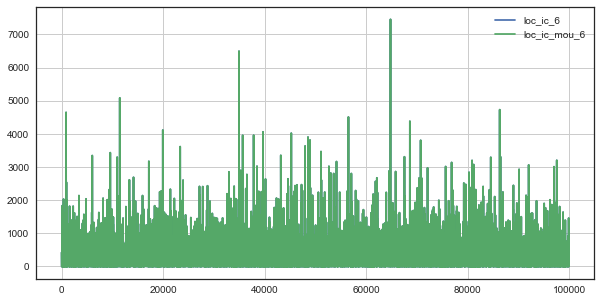

In [139]:
Churn_df[['loc_ic_6','loc_ic_mou_6']].plot(figsize=(10,5), grid=True)

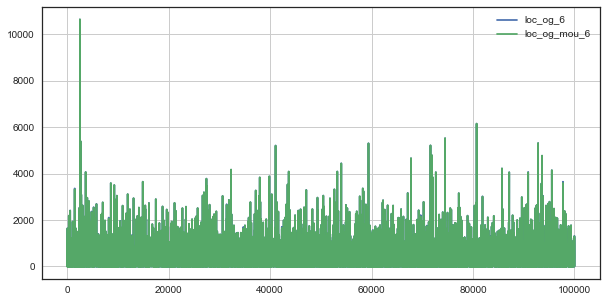

In [140]:
Churn_df[['loc_og_6','loc_og_mou_6']].plot(figsize=(10,5), grid=True)

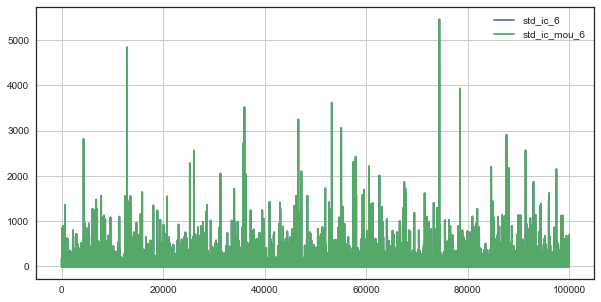

In [141]:
Churn_df[['std_ic_6','std_ic_mou_6']].plot(figsize=(10,5), grid=True)

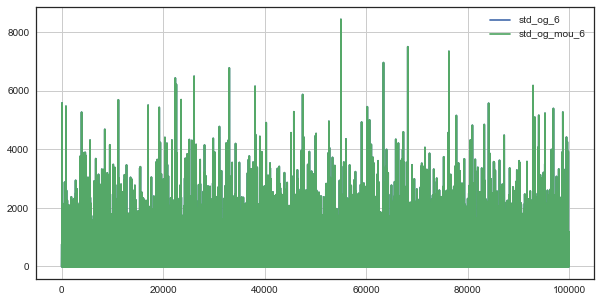

In [142]:
Churn_df[['std_og_6','std_og_mou_6']].plot(figsize=(10,5), grid=True)

In [143]:
# delete columns 
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('t2t')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('t2f')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('t2c')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('t2m')]]
Churn_df.drop(['loc_ic_6','loc_ic_7','loc_ic_8','loc_og_6','loc_og_7','loc_og_8','std_ic_6','std_ic_7','std_ic_8','std_og_6','std_og_7','std_og_8'], axis=1, inplace=True)
Churn_df.shape

(30001, 121)

In [144]:
# check for columns that add up other columns
Churn_df['total_ic_6'] = Churn_df['loc_ic_mou_6'] + Churn_df['std_ic_mou_6'] + Churn_df['isd_ic_mou_6'] + Churn_df['spl_ic_mou_6'] + Churn_df['ic_others_6']
Churn_df['total_ic_7'] = Churn_df['loc_ic_mou_7'] + Churn_df['std_ic_mou_7'] + Churn_df['isd_ic_mou_7'] + Churn_df['spl_ic_mou_7'] + Churn_df['ic_others_7']
Churn_df['total_ic_8'] = Churn_df['loc_ic_mou_8'] + Churn_df['std_ic_mou_8'] + Churn_df['isd_ic_mou_8'] + Churn_df['spl_ic_mou_8'] + Churn_df['ic_others_8']

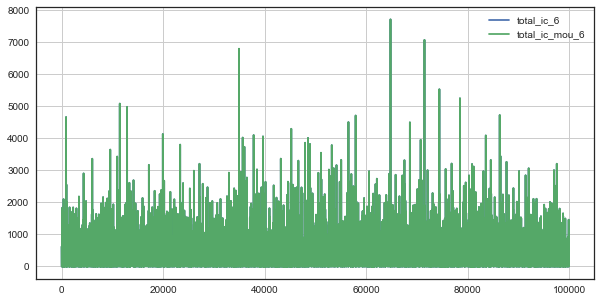

In [145]:

Churn_df[['total_ic_6','total_ic_mou_6']].plot(figsize=(10,5), grid=True)

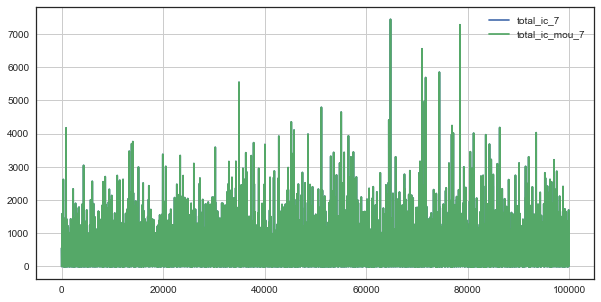

In [146]:
Churn_df[['total_ic_7','total_ic_mou_7']].plot(figsize=(10,5), grid=True)

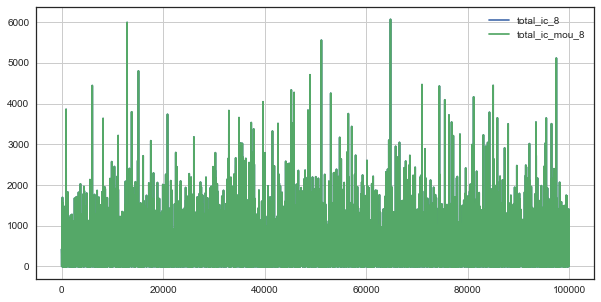

In [147]:
Churn_df[['total_ic_8','total_ic_mou_8']].plot(figsize=(10,5), grid=True)

In [148]:
# We notice that it is enough to retain the total_ic_mou_ columns and drop the individual ic_mou columns for 6,7 and 8 months
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('loc_ic_mou_')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('std_ic_mou_')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('isd_ic_mou_')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('spl_ic_mou_')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('ic_others_')]]
Churn_df.drop(['total_ic_6','total_ic_7','total_ic_8'], axis=1, inplace=True)
Churn_df.shape

(30001, 106)

In [149]:
Churn_df['total_og_6'] = Churn_df['loc_og_mou_6'] + Churn_df['std_og_mou_6'] + Churn_df['isd_og_mou_6'] + Churn_df['spl_og_mou_6'] + Churn_df['og_others_6']
Churn_df['total_og_7'] = Churn_df['loc_og_mou_7'] + Churn_df['std_og_mou_7'] + Churn_df['isd_og_mou_7'] + Churn_df['spl_og_mou_7'] + Churn_df['og_others_7']
Churn_df['total_og_8'] = Churn_df['loc_og_mou_8'] + Churn_df['std_og_mou_8'] + Churn_df['isd_og_mou_8'] + Churn_df['spl_og_mou_8'] + Churn_df['og_others_8']

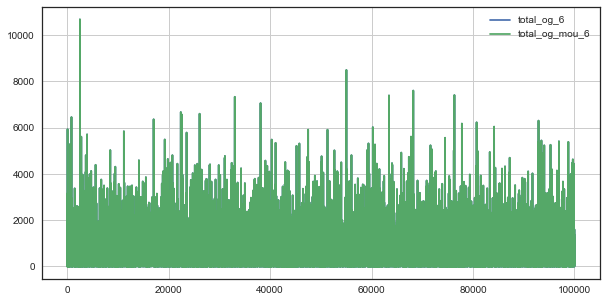

In [150]:
Churn_df[['total_og_6','total_og_mou_6']].plot(figsize=(10,5), grid=True)

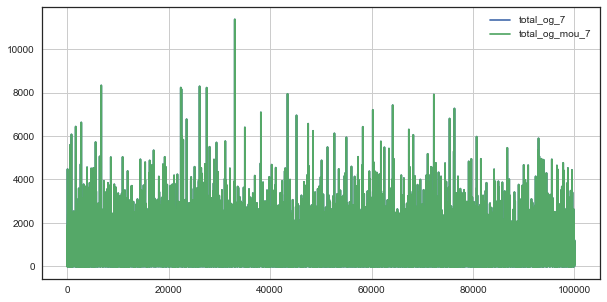

In [151]:
Churn_df[['total_og_7','total_og_mou_7']].plot(figsize=(10,5), grid=True)

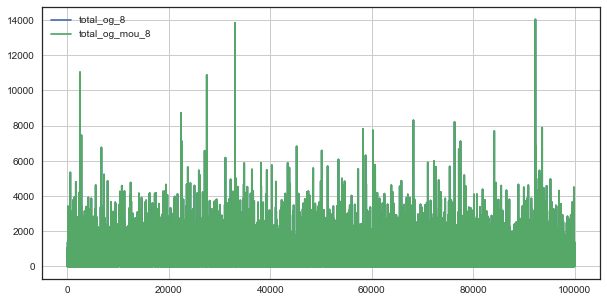

In [152]:
Churn_df[['total_og_8','total_og_mou_8']].plot(figsize=(10,5), grid=True)

In [153]:
# We notice that it is enough to retain the total_og_mou_ columns and drop the individual og_mou columns for 6,7 and 8 months
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('loc_og_mou_')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('std_og_mou_')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('isd_og_mou_')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('spl_og_mou_')]]
Churn_df = Churn_df[Churn_df.columns[~Churn_df.columns.str.contains('og_others_')]]
Churn_df.drop(['total_og_6','total_og_7','total_og_8'], axis=1, inplace=True)
Churn_df = Churn_df.loc[:, (Churn_df != 0).any(axis=0)]
Churn_df.shape


(30001, 85)

In [154]:
df1 =  Churn_df.select_dtypes(include=['float64', 'int64','int','int32'])
#df1.drop('Churn',axis=1, inplace=True)
df1.shape



(30001, 79)

In [155]:
df1 = df1.fillna(0)
df1 = df1.loc[:, (df1 != 0).any(axis=0)]
df1.shape

(30001, 79)

In [156]:
#df1 = df1[df1.columns[~df1.columns.str.contains('count')]]
#df1 = df1[df1.columns[~df1.columns.str.contains('arpu_2g')]]
#df1 = df1[df1.columns[~df1.columns.str.contains('arpu_3g')]]
#df1 = df1[df1.columns[~df1.columns.str.contains('max')]]
#df1 = df1[df1.columns[~df1.columns.str.contains('sep')]]
#df1 = df1[df1.columns[~df1.columns.str.contains('total_rech_data')]]
#df1 = df1[df1.columns[~df1.columns.str.contains('monthly')]]
#df1 = df1[df1.columns[~df1.columns.str.contains('last_day')]]
#df1 = df1[df1.columns[~df1.columns.str.contains('sachet')]]          
df1.drop(['mobile_number','circle_id'], axis=1, inplace=True)
df1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,487.53,609.24,350.16,626.46,558.04,428.74,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,508.36,431.66,171.56,103.86,28.49,16.54,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,860.34,1028.79,1068.54,207.09,131.89,261.04,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,134.38,140.04,239.48,119.58,222.89,298.33,3,5,4,0,454,439,0,179,179,0,179,0,0.0,2.0,2.0,0.0,179.0,179.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,356.0,270.0,0.00,0.48,0.01,0.00,599.09,1009.92,0.00,306.57,197.27,0.00,301.78,150.67,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0


## Outlier detection and removal

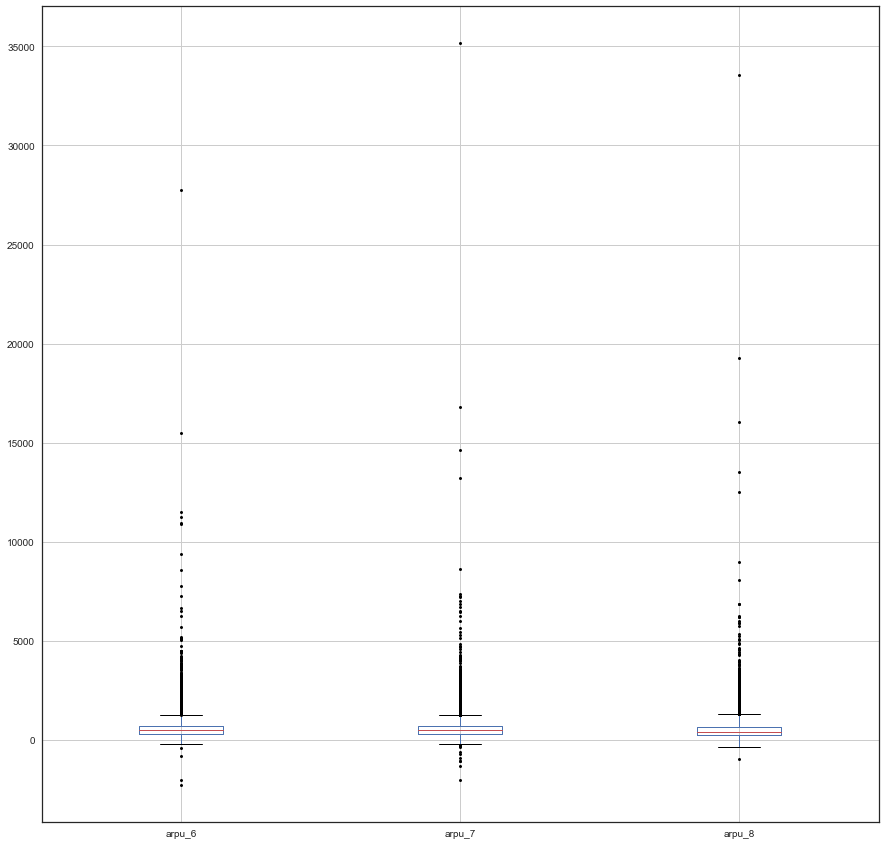

In [157]:
#Box plot for all the arpu variables
df1 = df1.fillna(0)
#df1 = (df1 - df1.mean()) / (df1.std()) 
fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot(['arpu_6', 'arpu_7', 'arpu_8'],sym='k.')

Although there are outliers in the arpu_ columns, these may be customers that generate more revenue than average, so it may not be advisable to remove these outliers.

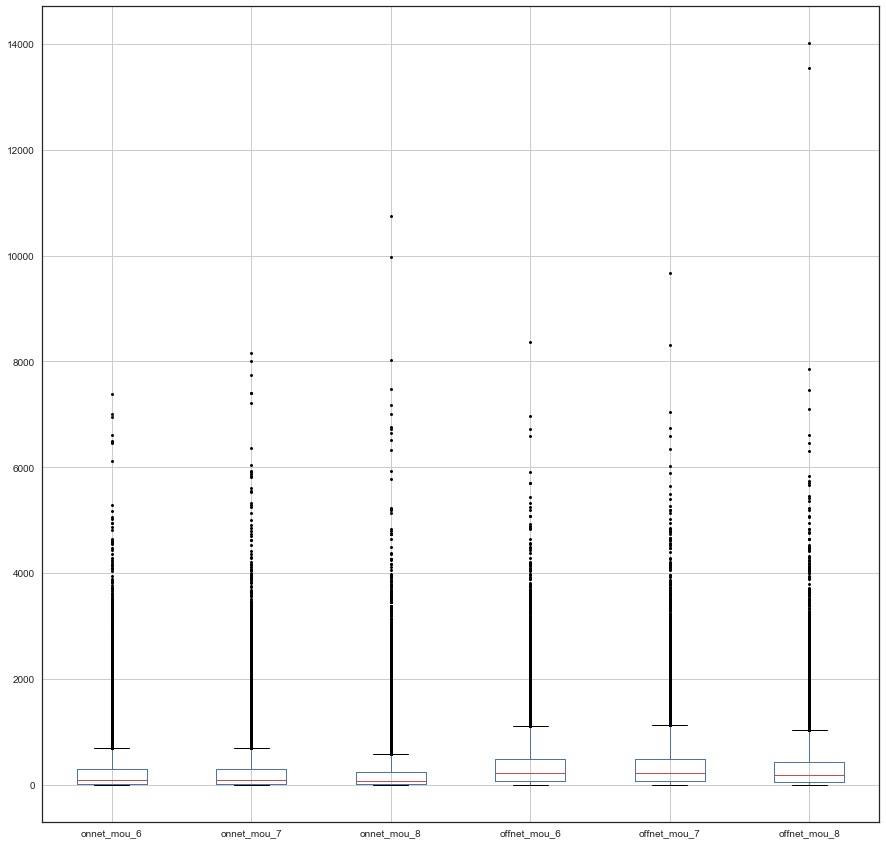

In [158]:
#On network minute usage
fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8','offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'],sym='k.')


For onnet_mou_ columns, there are outliers above 8000. These are to be removed.
For offnet_mou_ columns, there are outliers above 8000, these should be removed.

In [159]:
#Remove outliers
Churn_df = Churn_df[Churn_df["onnet_mou_6"] <= 8000 ]
Churn_df = Churn_df[Churn_df["onnet_mou_7"] <= 8000 ]
Churn_df = Churn_df[Churn_df["onnet_mou_8"] <= 8000 ]
Churn_df = Churn_df[Churn_df["offnet_mou_6"] <= 8000 ]
Churn_df = Churn_df[Churn_df["offnet_mou_7"] <= 8000 ]
Churn_df = Churn_df[Churn_df["offnet_mou_8"] <= 8000 ]
Churn_df.shape

(29992, 85)

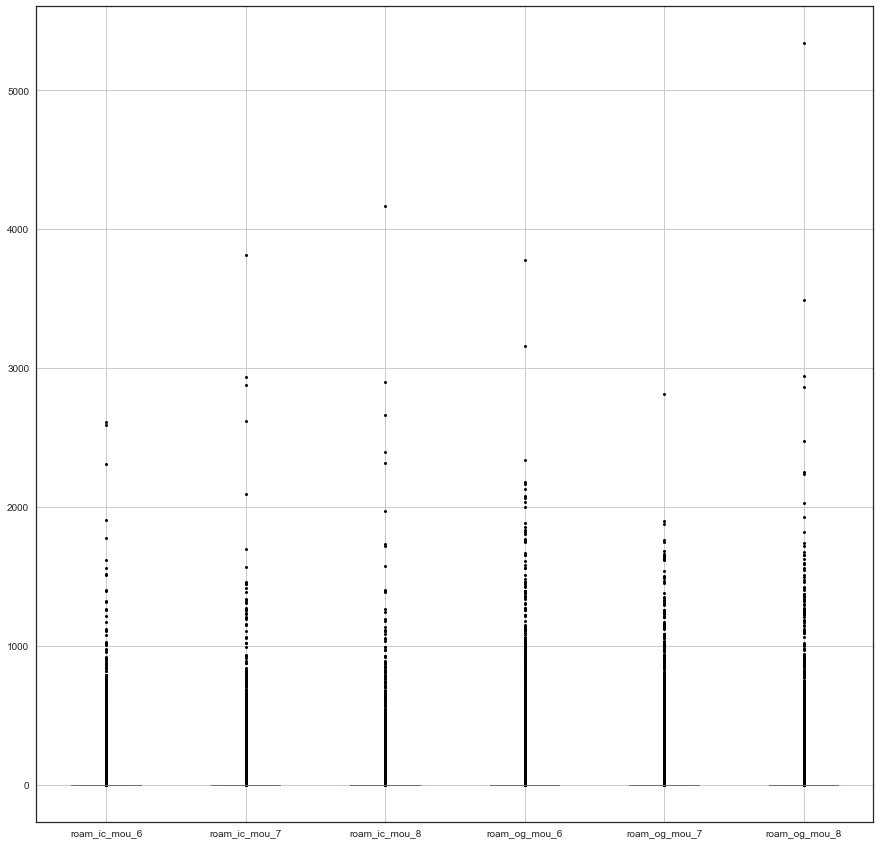

In [160]:
#Box plot for roaming incoming mou variables
fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8','roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'],ax=ax,sym='k.')

Outliers are seen above 3000 for roam_ic_mou_ and roam_og_mou_ columns. These are removed.

In [161]:
#Remove outliers
Churn_df = Churn_df[Churn_df["roam_ic_mou_6"] <= 3000 ]
Churn_df = Churn_df[Churn_df["roam_ic_mou_7"] <= 3000 ]
Churn_df = Churn_df[Churn_df["roam_ic_mou_8"] <= 3000 ]
Churn_df = Churn_df[Churn_df["roam_og_mou_6"] <= 3000 ]
Churn_df = Churn_df[Churn_df["roam_og_mou_7"] <= 3000 ]
Churn_df = Churn_df[Churn_df["roam_og_mou_8"] <= 3000 ]
Churn_df.shape

(29986, 85)

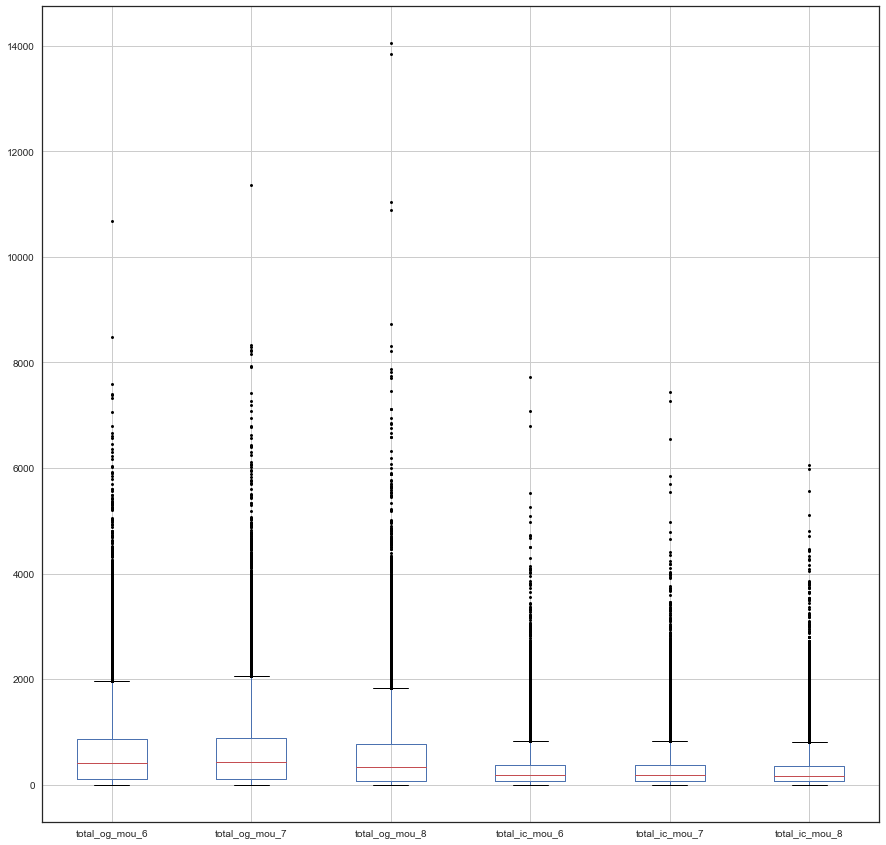

In [162]:
fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot(['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'],sym='k.')

There are outliers in total_og_mou_ above 10000. These are to be removed.


In [163]:
#Remove outliers
Churn_df = Churn_df[Churn_df["total_og_mou_6"] <= 10000 ]
Churn_df = Churn_df[Churn_df["total_og_mou_7"] <= 10000 ]
Churn_df = Churn_df[Churn_df["total_og_mou_8"] <= 10000 ]
Churn_df.shape

(29986, 85)

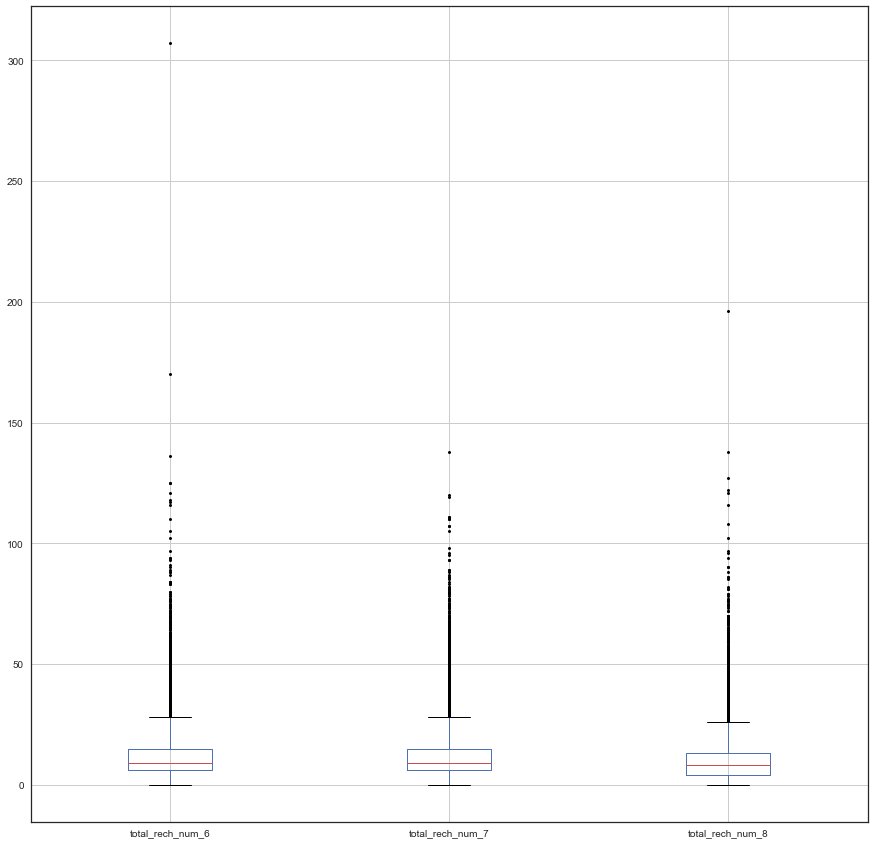

In [164]:

fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'],sym='k.')



Outliers above 150 will be removed.

In [165]:
#Remove outliers
Churn_df = Churn_df[Churn_df["total_rech_num_6"] <= 150]
Churn_df = Churn_df[Churn_df["total_rech_num_7"] <= 150]
Churn_df = Churn_df[Churn_df["total_rech_num_8"] <= 150]

Churn_df.shape

(29983, 85)

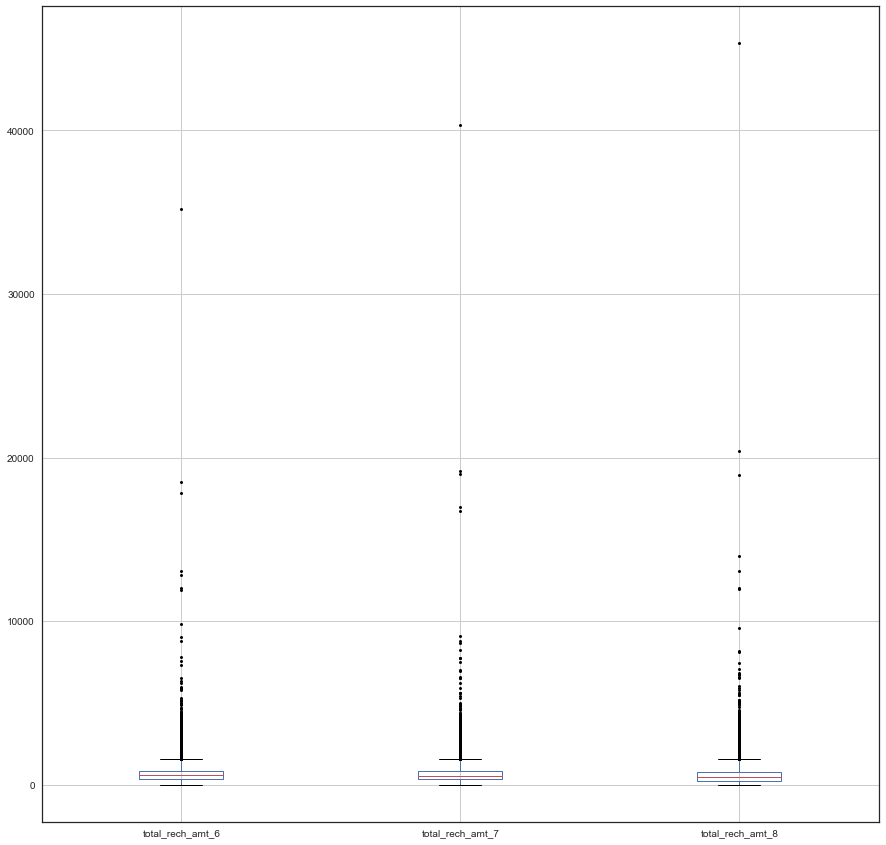

In [166]:


fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'],sym='k.')

Outliers above 30000 are removed.

In [167]:
#Remove outliers
Churn_df = Churn_df[Churn_df["total_rech_amt_6"] <= 30000]
Churn_df = Churn_df[Churn_df["total_rech_amt_7"] <= 30000]
Churn_df = Churn_df[Churn_df["total_rech_amt_8"] <= 30000]

Churn_df.shape

(29982, 85)

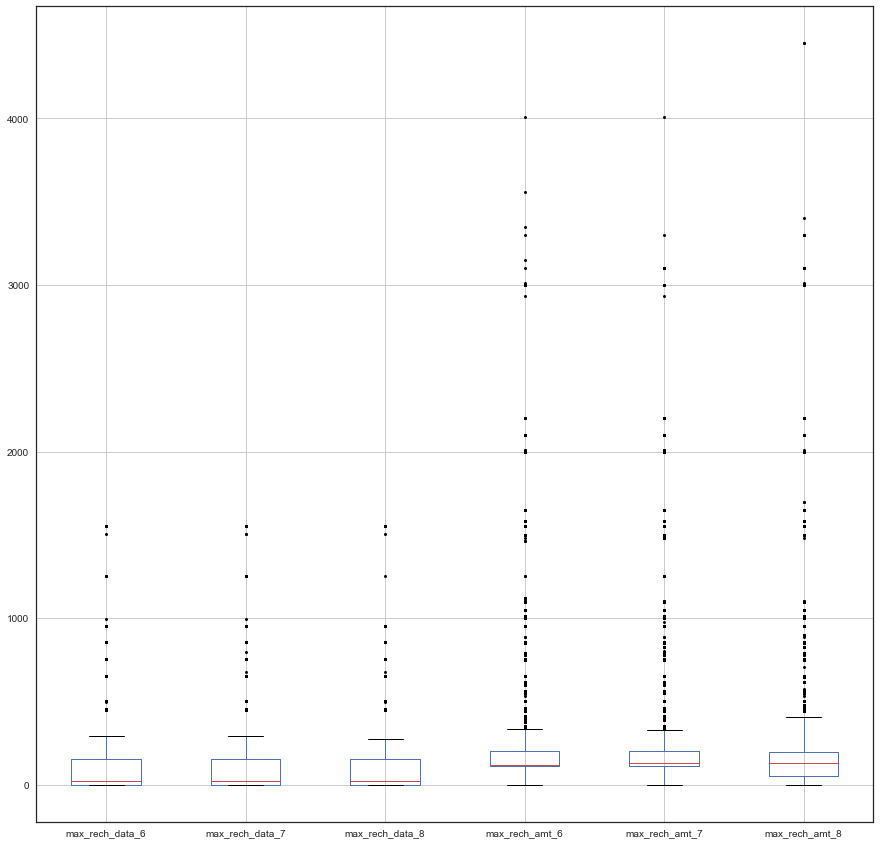

In [168]:
fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot(['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'],sym='k.')


Values above 4000 are removed as they are outliers.

In [169]:
#Remove outliers
Churn_df = Churn_df[Churn_df["max_rech_data_6"] <= 4000]
Churn_df = Churn_df[Churn_df["max_rech_data_7"] <= 4000]
Churn_df = Churn_df[Churn_df["max_rech_data_8"] <= 4000]
Churn_df = Churn_df[Churn_df["max_rech_amt_6"] <= 4000]
Churn_df = Churn_df[Churn_df["max_rech_amt_7"] <= 4000]
Churn_df = Churn_df[Churn_df["max_rech_amt_8"] <= 4000]

Churn_df.shape


(29978, 85)

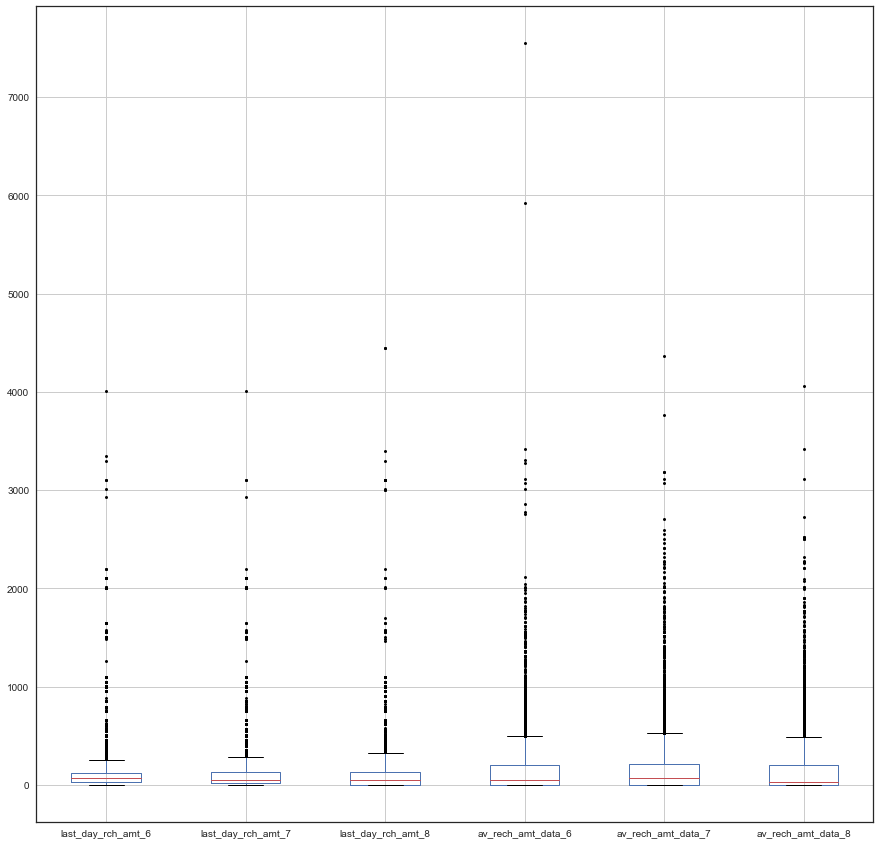

In [170]:

fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot(['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],sym='k.')

Values above 5000 are treated as outliers and are removed 

In [171]:
#Remove outliers
Churn_df = Churn_df[Churn_df["av_rech_amt_data_6"] <= 5000]
Churn_df = Churn_df[Churn_df["av_rech_amt_data_7"] <= 5000]
Churn_df = Churn_df[Churn_df["av_rech_amt_data_8"] <= 5000]

Churn_df.shape

(29976, 85)

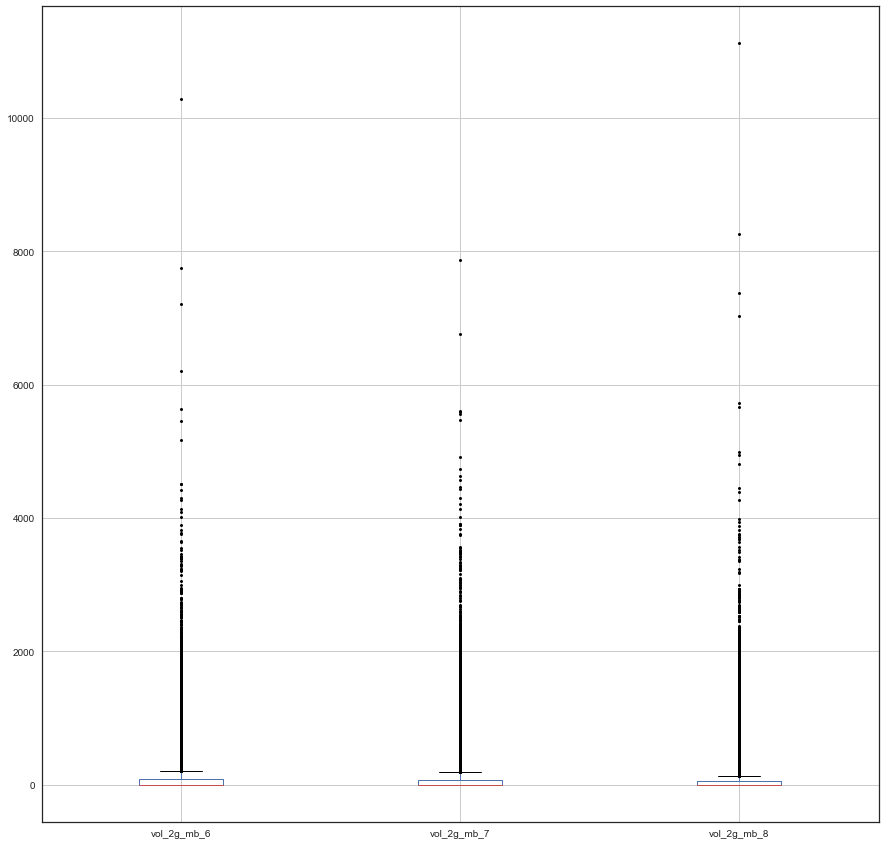

In [172]:

fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot(['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8'],sym='k.')

Values beyond 10000 are outliers and are removed.

In [173]:
#Remove outliers
Churn_df = Churn_df[Churn_df["vol_2g_mb_6"] <= 10000]
Churn_df = Churn_df[Churn_df["vol_2g_mb_7"] <= 10000]
Churn_df = Churn_df[Churn_df["vol_2g_mb_8"] <= 10000]

Churn_df.shape

(29974, 85)

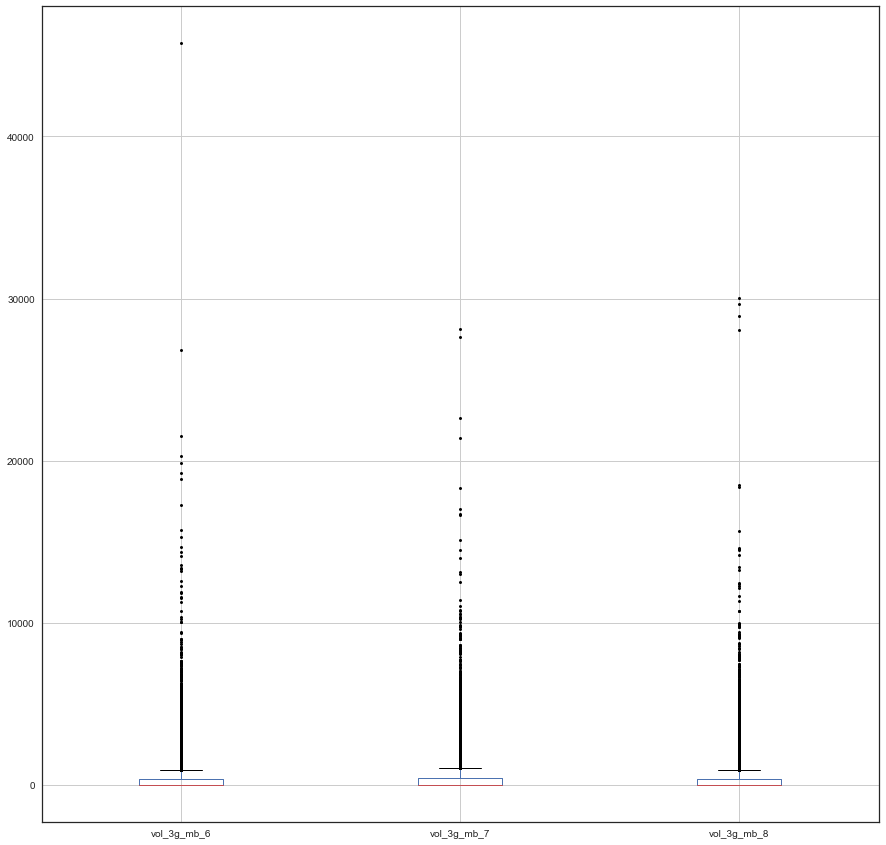

In [174]:
fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot(['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8'],sym='k.')

Values greater than 25000 are removed as they seem to be outliers.

In [175]:
#Remove outliers
Churn_df = Churn_df[Churn_df["vol_3g_mb_6"] <= 25000]
Churn_df = Churn_df[Churn_df["vol_3g_mb_7"] <= 25000]
Churn_df = Churn_df[Churn_df["vol_3g_mb_8"] <= 25000]

Churn_df.shape

(29970, 85)

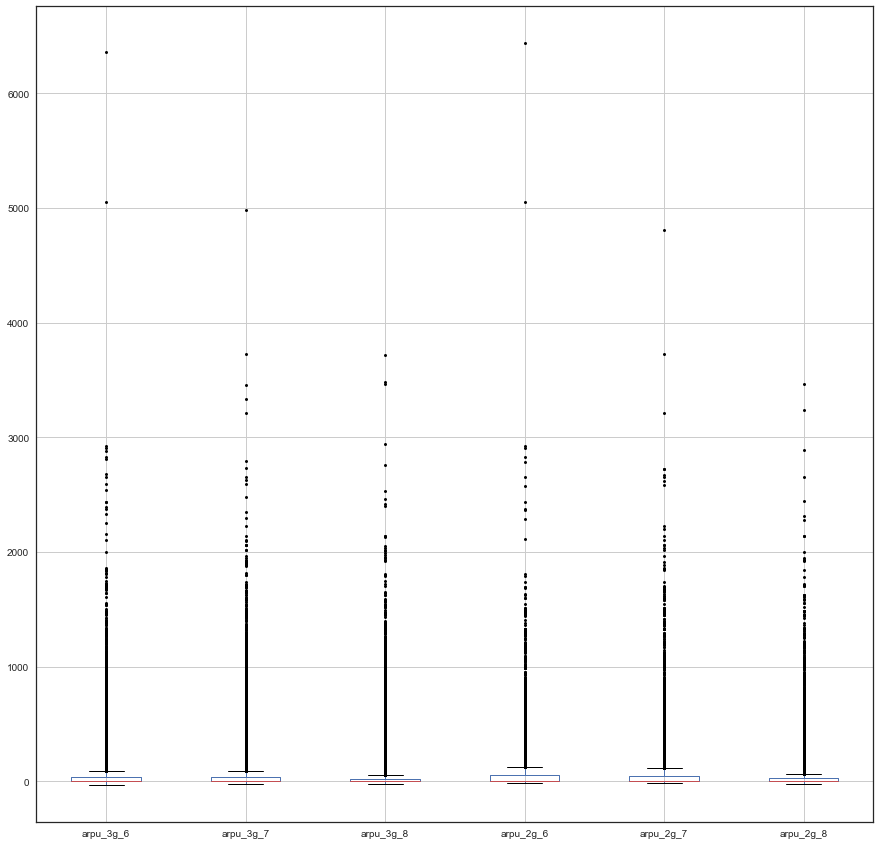

In [176]:

fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot(['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],sym='k.')

Although there are outliers in arpu_2g and arpu_3g columns, we retain them in case they influence churn.

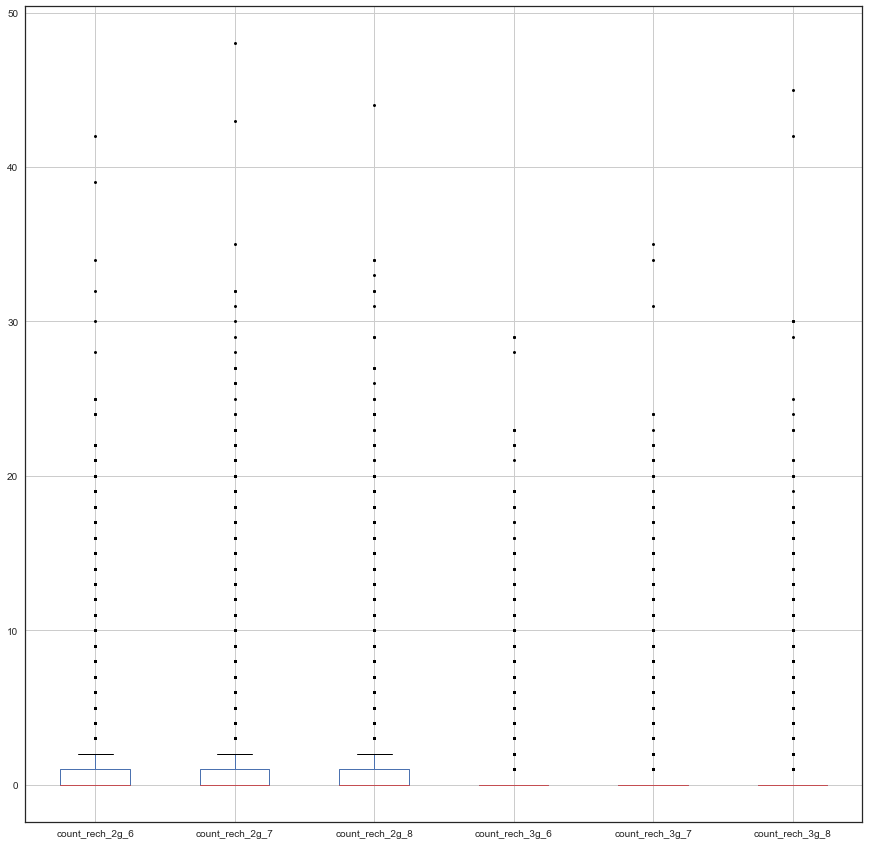

In [177]:

fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'],sym='k.')


Let us consider values above 45 as outliers and removed them.

In [178]:
#Remove outliers
Churn_df = Churn_df[Churn_df["count_rech_2g_6"] <= 45]
Churn_df = Churn_df[Churn_df["count_rech_2g_7"] <= 45]
Churn_df = Churn_df[Churn_df["count_rech_2g_8"] <= 45]
Churn_df = Churn_df[Churn_df["count_rech_3g_6"] <= 45]
Churn_df = Churn_df[Churn_df["count_rech_3g_7"] <= 45]
Churn_df = Churn_df[Churn_df["count_rech_3g_8"] <= 45]

Churn_df.shape

(29969, 85)

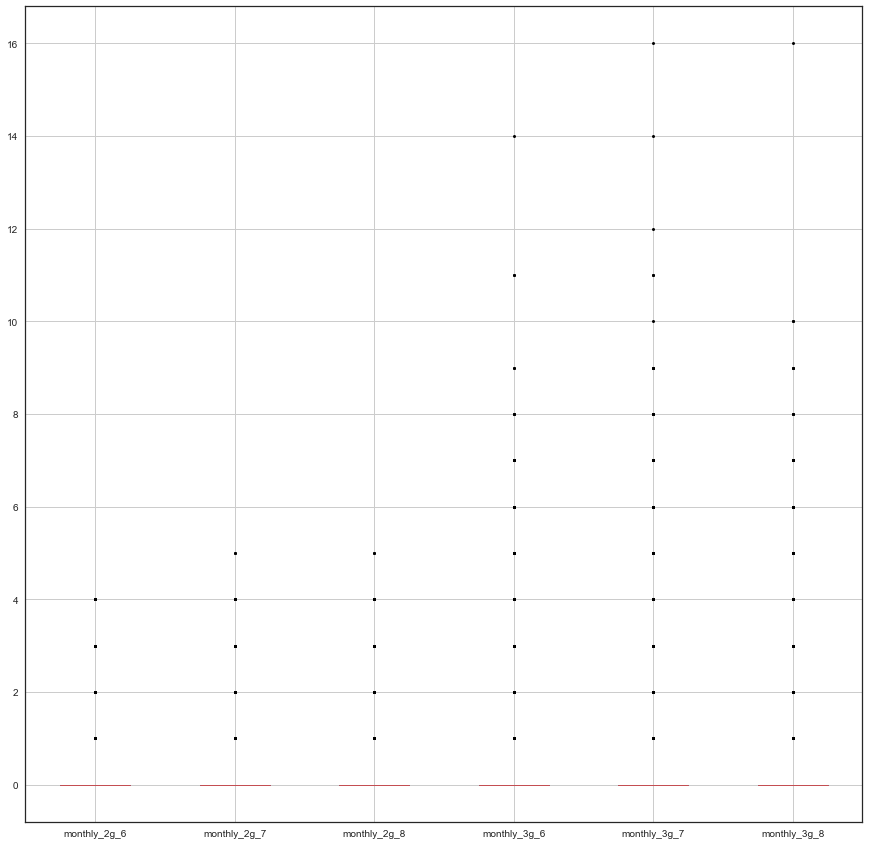

In [179]:

fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8','monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8'],sym='k.')


No noticeable outliers in monthly_2g, monthly_3g columns.

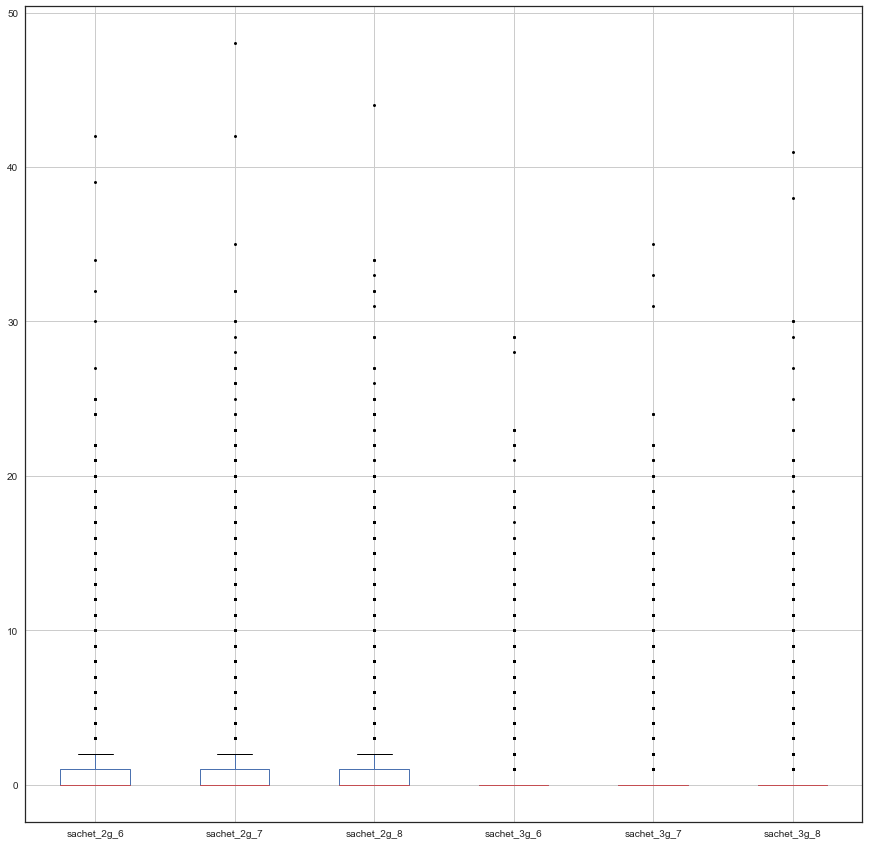

In [180]:

fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8','sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'],sym='k.')

Values above 45 are considered outliers and removed.

In [181]:
#Remove outliers
Churn_df = Churn_df[Churn_df["sachet_2g_6"] <= 45]
Churn_df = Churn_df[Churn_df["sachet_2g_7"] <= 45]
Churn_df = Churn_df[Churn_df["sachet_2g_8"] <= 45]
Churn_df = Churn_df[Churn_df["sachet_3g_6"] <= 45]
Churn_df = Churn_df[Churn_df["sachet_3g_7"] <= 45]
Churn_df = Churn_df[Churn_df["sachet_3g_8"] <= 45]

Churn_df.shape

(29969, 85)

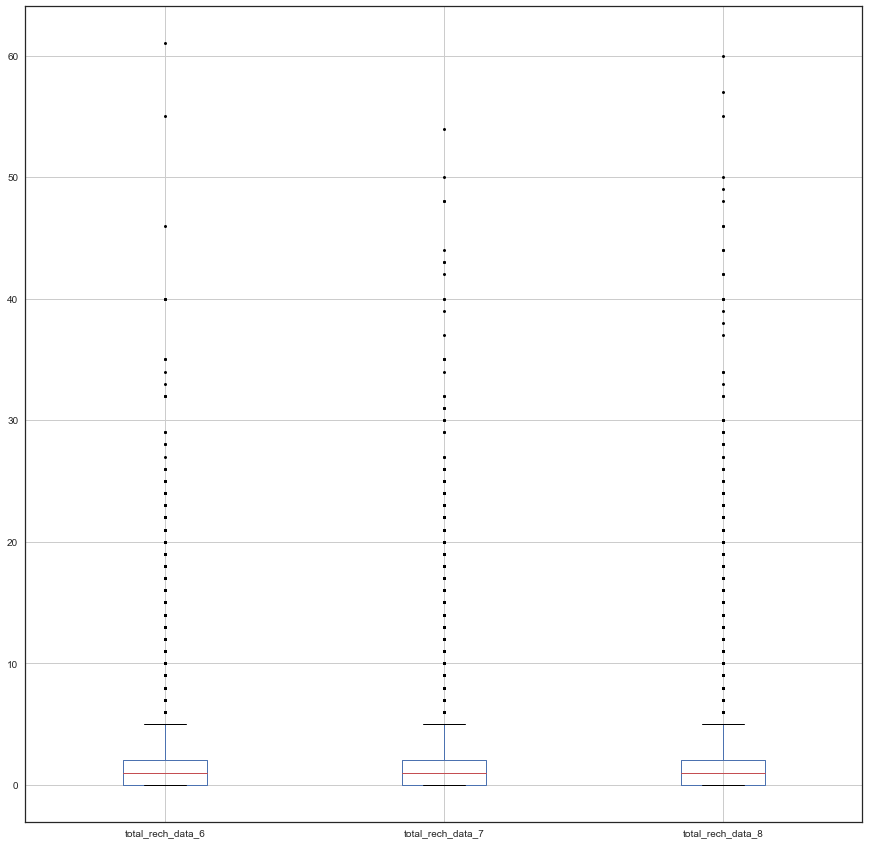

In [182]:

fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8'],sym='k.')

No outliers found in total_rech_data columns.

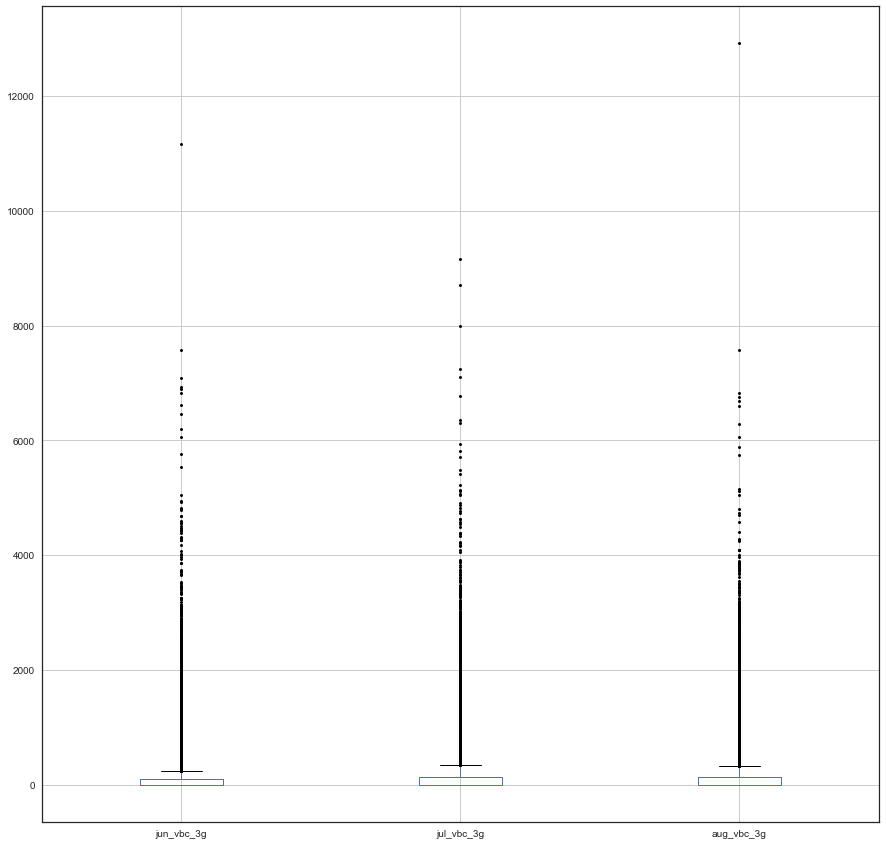

In [183]:

fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot(['jun_vbc_3g', 'jul_vbc_3g','aug_vbc_3g'],sym='k.')

Values above 10000 are removed as outliers.

In [184]:
#Remove outliers
Churn_df = Churn_df[Churn_df["jun_vbc_3g"] <= 10000]
Churn_df = Churn_df[Churn_df["jul_vbc_3g"] <= 10000]
Churn_df = Churn_df[Churn_df["aug_vbc_3g"] <= 10000]

Churn_df.shape

(29967, 85)

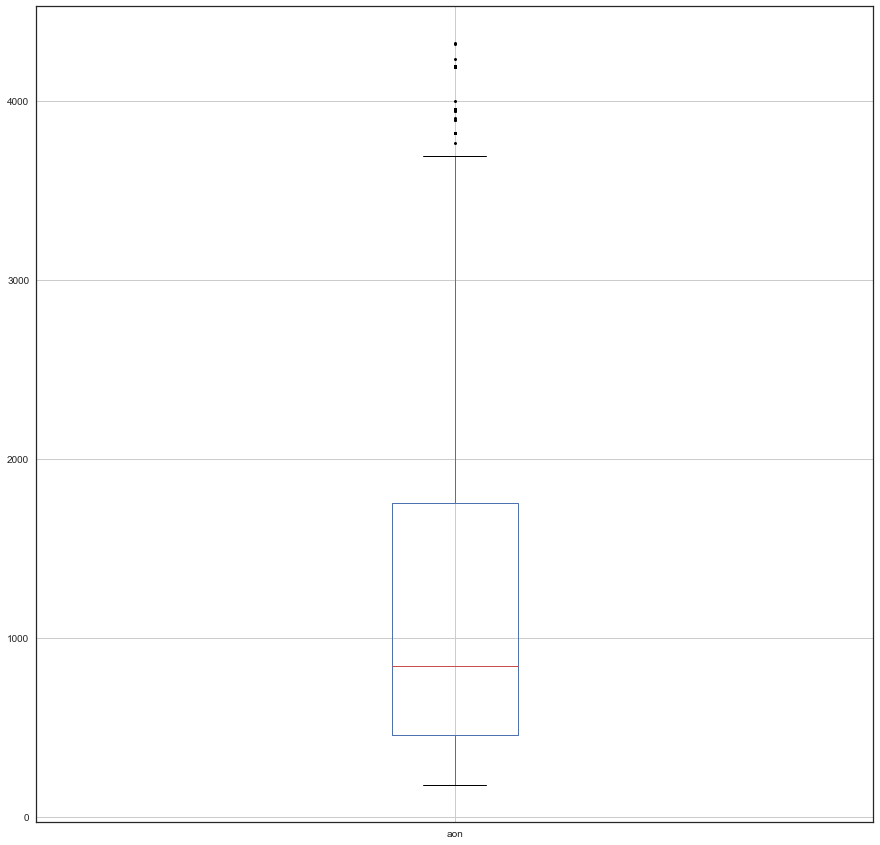

In [185]:
fig, ax = plt.subplots(figsize=(15,  15))
df1.boxplot('aon',sym='k.')

No outlier found in age on network column.

## Univariate analysis (plot variables vs Churn)

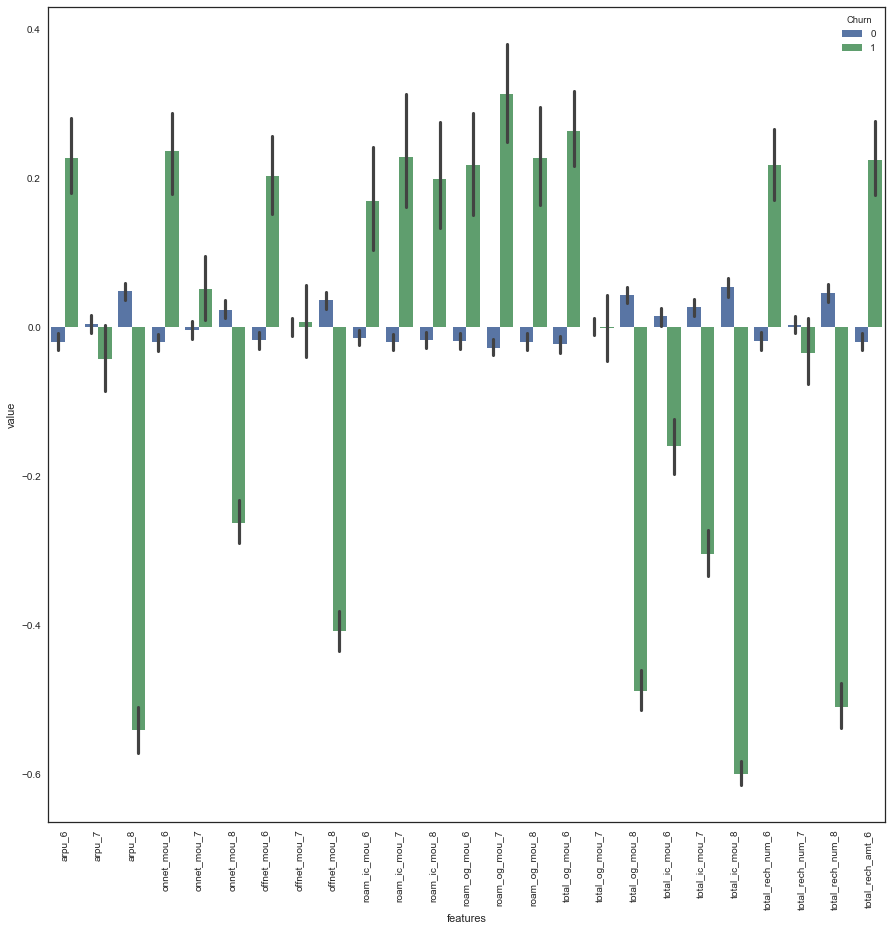

In [186]:
# replace nan with 0

df1 = df1.fillna(0)

y = df1.Churn                        

data = df1
#data_n_2 = (data - data.mean()) / (data.std()) 

df_std = (df1 - df1.mean()) / (df1.std())              # standardization

data = pd.concat([y,df_std.iloc[:,0:25]],axis=1) # 25 variables
data = pd.melt(data,id_vars="Churn",var_name="features",value_name='value')  

plt.figure(figsize=(15,15))
sns.barplot(x="features", y="value", hue="Churn", data=data)
plt.xticks(rotation=90)  
plt.show()



arpu_6, arpu_8, onnet_mou_8, offnet_mou_8,roam_og_mou_7,total_og_mou_8,total_ic_mou_7,total_ic_mou_8,total_rech_num_8 seem to have a strong influence on churn of the customers.

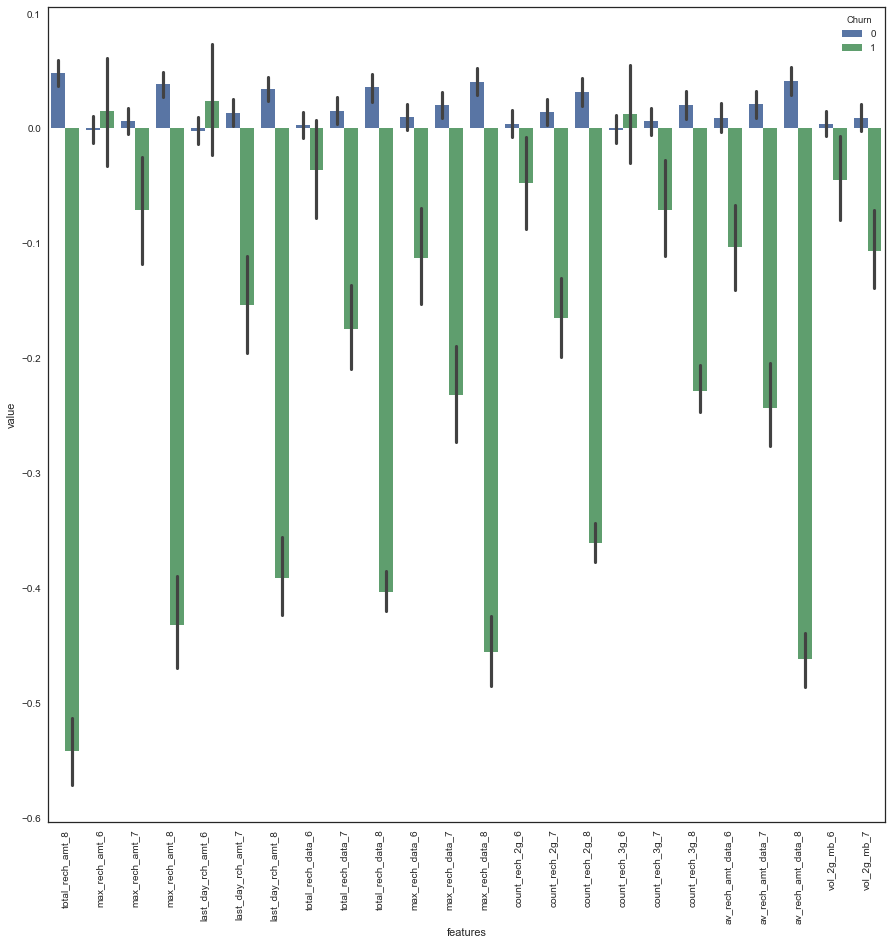

In [187]:
data = pd.concat([y,df_std.iloc[:,26:50]],axis=1) # 25 variables
data = pd.melt(data,id_vars="Churn",var_name="features",value_name='value')  

plt.figure(figsize=(15,15))
sns.barplot(x="features", y="value", hue="Churn", data=data)
plt.xticks(rotation=90)  
plt.show()


total_rech_amnt_8, max_rech_amnt_8, last_day_rech_amnt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,av_rech_amnt_data_8 seem to be strong predictors.

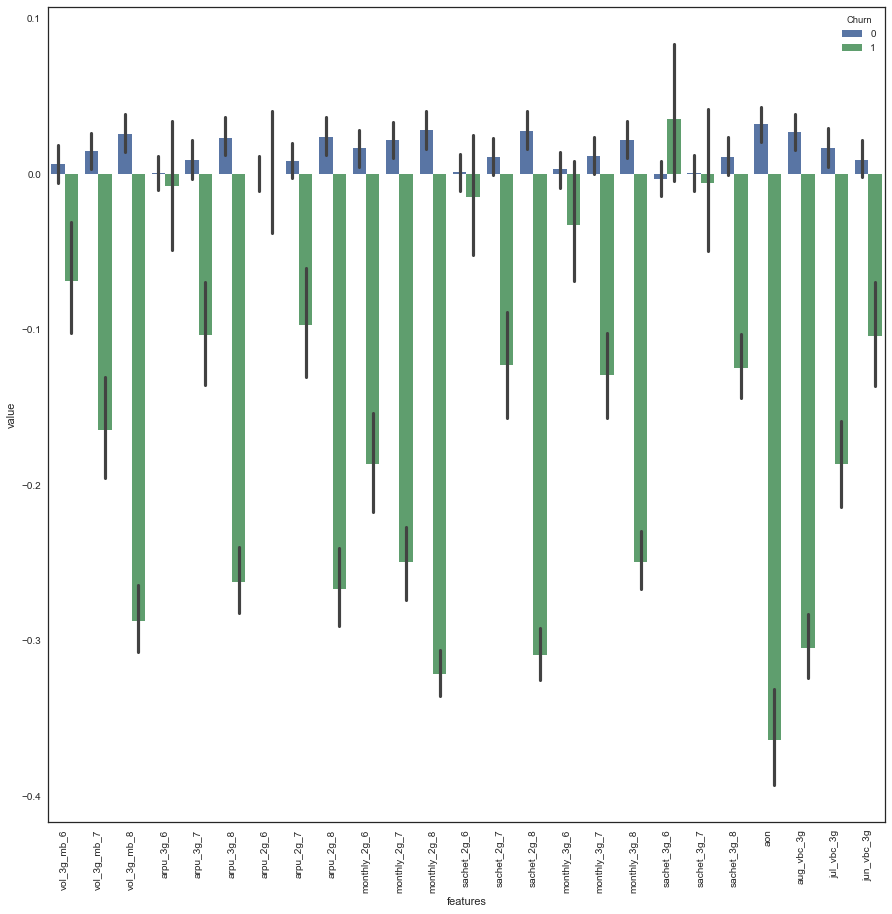

In [189]:
data = pd.concat([y,df_std.iloc[:,51:76]],axis=1) # 25 variables
data = pd.melt(data,id_vars="Churn",var_name="features",value_name='value')  

plt.figure(figsize=(15,15))
sns.barplot(x="features", y="value", hue="Churn", data=data)
plt.xticks(rotation=90)  
plt.show()


vol_3g_mb_8,arpu_3g_8,arpu_2g_8,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_8,aon,aug_vbc_3g seem to highly influence churn.

Univariate plots are difficult to plot and analyze for such high-dimensionality data. So we proceed with plotting the heatmap to find variables that are correlated.

## Bivariate analysis (Correlation matrix)

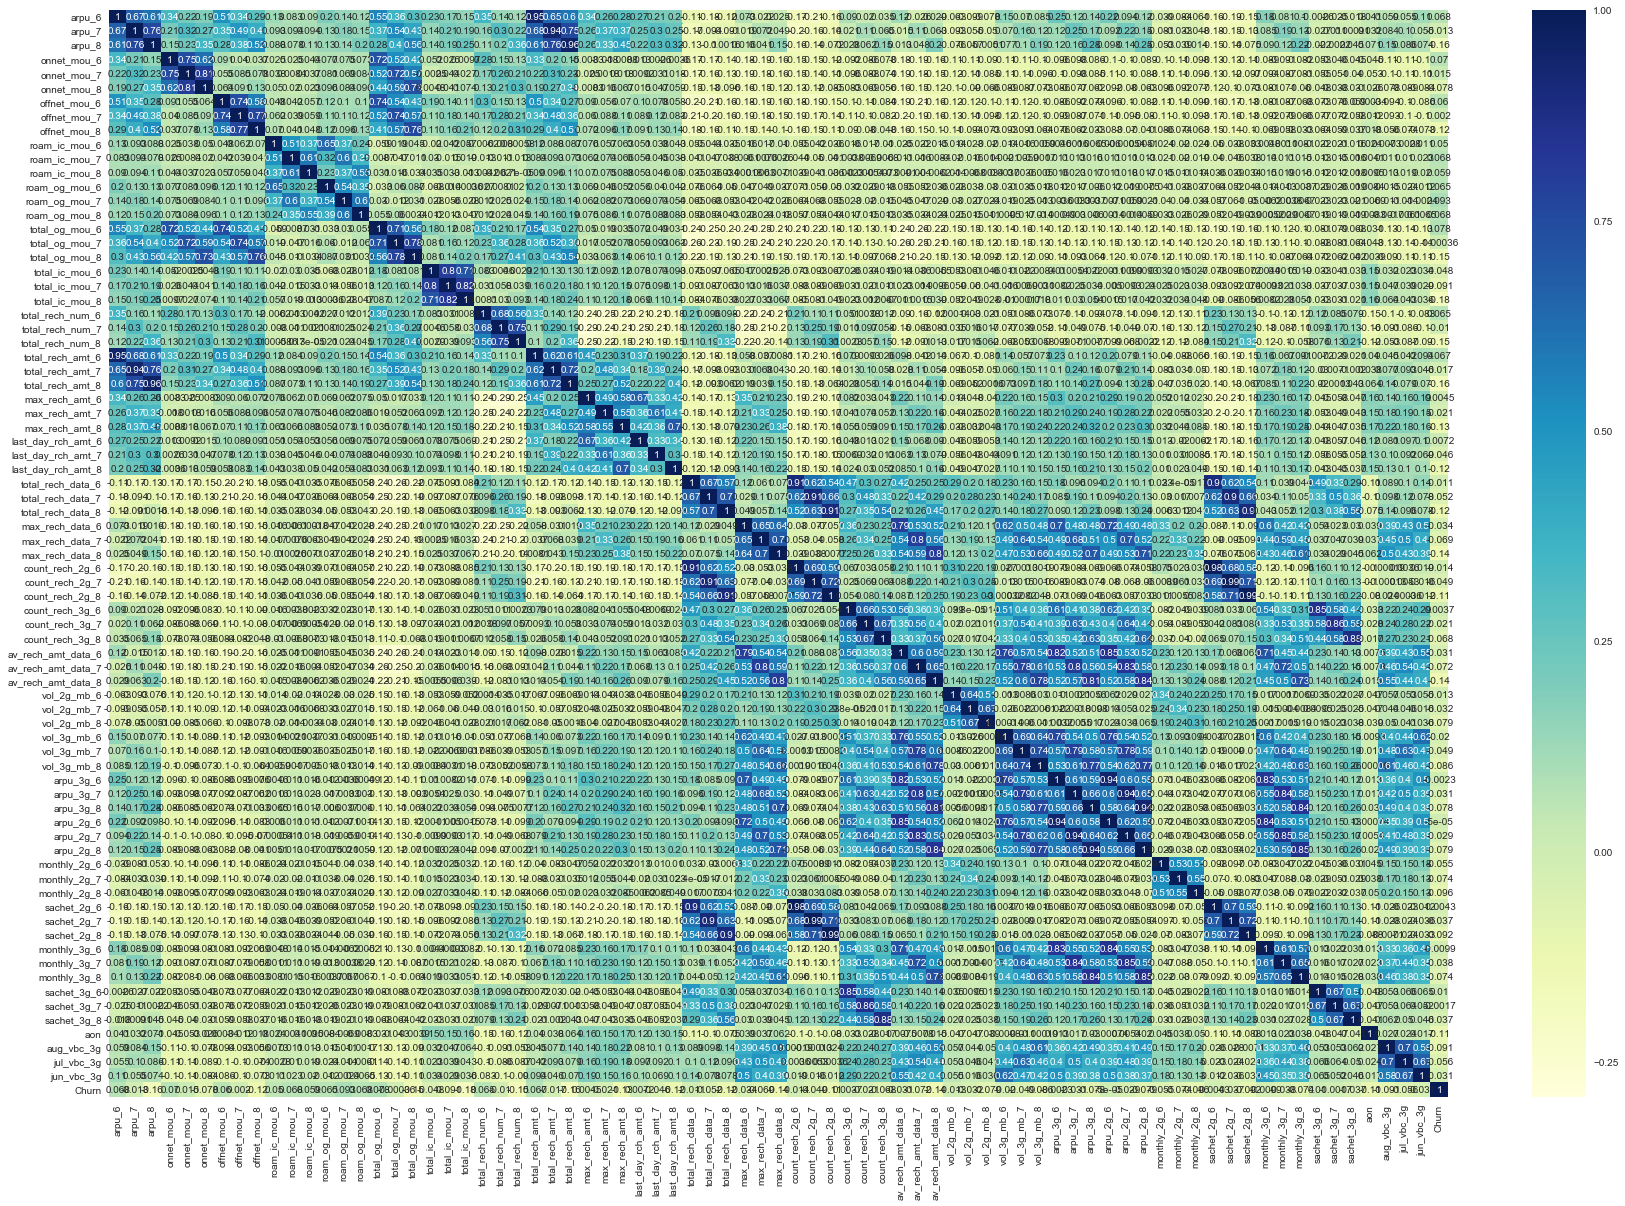

In [190]:
## collect all the numerical variables


cor = df1.corr()
cor
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [191]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


print(get_top_abs_correlations(df1, 40))

count_rech_2g_8     sachet_2g_8           0.987161
count_rech_2g_7     sachet_2g_7           0.986408
count_rech_2g_6     sachet_2g_6           0.984924
arpu_8              total_rech_amt_8      0.955351
arpu_6              total_rech_amt_6      0.946125
arpu_7              total_rech_amt_7      0.943588
arpu_3g_6           arpu_2g_6             0.940079
arpu_3g_8           arpu_2g_8             0.937701
arpu_3g_7           arpu_2g_7             0.936447
total_rech_data_6   count_rech_2g_6       0.911384
total_rech_data_7   count_rech_2g_7       0.910279
total_rech_data_8   count_rech_2g_8       0.906664
total_rech_data_7   sachet_2g_7           0.904243
total_rech_data_6   sachet_2g_6           0.903875
total_rech_data_8   sachet_2g_8           0.900629
count_rech_3g_8     sachet_3g_8           0.875291
count_rech_3g_7     sachet_3g_7           0.857999
arpu_2g_8           monthly_3g_8          0.854830
count_rech_3g_6     sachet_3g_6           0.851086
arpu_2g_7           monthly_3g_

Following are the observations from the heatmap:

1) count_rech, sachet_rech and total_rech_data are highly correlated

2) arpu_ and total_rech_amt_ are highly correlated

3) arpu_3g and monthly_3g highly correlated

4) arpu_3g and arpu_2g are highly correlated




# Derived Variable Creation

In [192]:
Churn_df.shape

(29967, 85)

#### Note :- Derived Variable Name 1: Running growth rates using past two months history for arpu , arpu_3g , arpu 2g and rechg amount

#### below variable which we have already created will be affected by average so better to calculate running growth rates

In [193]:
Churn_df['arpu_growth_rate_past1mon'] = ((Churn_df.arpu_8 - Churn_df.arpu_7)/ Churn_df.arpu_7)
Churn_df['arpu_growth_rate_past2mon'] = ((Churn_df.arpu_7 - Churn_df.arpu_6)/ Churn_df.arpu_6)
Churn_df['arpu_3g_growth_rate_past1mon'] = ((Churn_df.arpu_3g_8 - Churn_df.arpu_3g_7)/ Churn_df.arpu_3g_7)
Churn_df['arpu_3g_growth_rate_past2mon'] = ((Churn_df.arpu_3g_7 - Churn_df.arpu_3g_6)/ Churn_df.arpu_3g_6)
Churn_df['arpu_2g_growth_rate_past1mon'] = ((Churn_df.arpu_2g_8 - Churn_df.arpu_2g_7)/ Churn_df.arpu_2g_7)
Churn_df['arpu_2g_growth_rate_past2mon'] = ((Churn_df.arpu_2g_7 - Churn_df.arpu_2g_6)/ Churn_df.arpu_2g_6)
Churn_df['rch_amt_growth_rate_past1mon'] = ((Churn_df.last_day_rch_amt_8 - Churn_df.last_day_rch_amt_7)/ Churn_df.last_day_rch_amt_7)
Churn_df['rch_amt_growth_rate_past2mon'] = ((Churn_df.last_day_rch_amt_7 - Churn_df.last_day_rch_amt_6)/ Churn_df.last_day_rch_amt_6)



In [194]:
# replace inf in derived variables with nan


Churn_df['arpu_growth_rate_past1mon'] = Churn_df['arpu_growth_rate_past1mon'].replace(-np.inf, np.nan)
Churn_df['arpu_growth_rate_past2mon'] = Churn_df['arpu_growth_rate_past2mon'].replace(-np.inf, np.nan)
Churn_df['arpu_3g_growth_rate_past1mon'] = Churn_df['arpu_3g_growth_rate_past1mon'].replace(-np.inf, np.nan)
Churn_df['arpu_3g_growth_rate_past2mon'] = Churn_df['arpu_3g_growth_rate_past2mon'].replace(-np.inf, np.nan)
Churn_df['arpu_2g_growth_rate_past1mon'] = Churn_df['arpu_2g_growth_rate_past1mon'].replace(-np.inf, np.nan)
Churn_df['arpu_2g_growth_rate_past2mon'] = Churn_df['arpu_2g_growth_rate_past2mon'].replace(-np.inf, np.nan)
Churn_df['rch_amt_growth_rate_past1mon'] = Churn_df['rch_amt_growth_rate_past1mon'].replace(-np.inf, np.nan)
Churn_df['rch_amt_growth_rate_past2mon'] = Churn_df['rch_amt_growth_rate_past2mon'].replace(-np.inf, np.nan)

Churn_df['arpu_growth_rate_past1mon'] = Churn_df['arpu_growth_rate_past1mon'].replace(np.inf, np.nan)
Churn_df['arpu_growth_rate_past2mon'] = Churn_df['arpu_growth_rate_past2mon'].replace(np.inf, np.nan)
Churn_df['arpu_3g_growth_rate_past1mon'] = Churn_df['arpu_3g_growth_rate_past1mon'].replace(np.inf, np.nan)
Churn_df['arpu_3g_growth_rate_past2mon'] = Churn_df['arpu_3g_growth_rate_past2mon'].replace(np.inf, np.nan)
Churn_df['arpu_2g_growth_rate_past1mon'] = Churn_df['arpu_2g_growth_rate_past1mon'].replace(np.inf, np.nan)
Churn_df['arpu_2g_growth_rate_past2mon'] = Churn_df['arpu_2g_growth_rate_past2mon'].replace(np.inf, np.nan)
Churn_df['rch_amt_growth_rate_past1mon'] = Churn_df['rch_amt_growth_rate_past1mon'].replace(np.inf, np.nan)
Churn_df['rch_amt_growth_rate_past2mon'] = Churn_df['rch_amt_growth_rate_past2mon'].replace(np.inf, np.nan)


In [195]:
# replace nan with 0
Churn_df = Churn_df.fillna(0)

In [196]:
from dateutil.parser import parse

def is_date(string):
    try: 
        parse(string)
        return True
    except ValueError:
        return False

In [197]:
Churn_df['last_date_of_month_6'] = Churn_df['last_date_of_month_6'].astype('str')
Churn_df['last_date_of_month_7'] = Churn_df['last_date_of_month_7'].astype('str')
Churn_df['last_date_of_month_8'] = Churn_df['last_date_of_month_8'].astype('str')
#Churn_df.dtypes
#Churn_df.columns

In [198]:
# binary flagging for last dates
#Churn_df['last_date_of_pastmonth_3_flag'] = Churn_df.last_date_of_month_6.map( lambda x: 1 if is_date(x) else 0)-- NA as it will be always present
Churn_df['last_date_of_pastmonth_2_flag'] = Churn_df.last_date_of_month_7.map( lambda x: 1 if is_date(x) else 0)
Churn_df['last_date_of_pastmonth_1_flag'] = Churn_df.last_date_of_month_8.map( lambda x: 1 if is_date(x) else 0)

In [199]:
# binary flagging for recharge dates
#Churn_df['last_date_of_rech_pastmonth_2_flag'] = Churn_df.date_of_last_rech_7.map( lambda x: 1 if is_date(x) else 0)
#Churn_df['last_date_of_rech_pastmonth_1_flag'] = Churn_df.date_of_last_rech_8.map( lambda x: 1 if is_date(x) else 0)

In [200]:
from datetime import datetime
Churn_df['rechg_past1month_days'] = (pd.to_datetime(Churn_df.date_of_last_rech_7) - pd.to_datetime(Churn_df.date_of_last_rech_6)).dt.days
Churn_df['rechg_past2month_days'] = (pd.to_datetime(Churn_df.date_of_last_rech_8) - pd.to_datetime(Churn_df.date_of_last_rech_7)).dt.days

In [201]:
Churn_df['avg_rechg_days'] = ((Churn_df.rechg_past1month_days + Churn_df.rechg_past2month_days)/2)
Churn_df['diff_rechg_days'] = Churn_df['rechg_past2month_days'] - Churn_df['rechg_past1month_days']

In [202]:
Churn_df.columns

Index(['mobile_number', 'circle_id', 'last_date_of_month_6',
       'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7',
       'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6',
       'count_rech_

In [203]:
Churn_df.columns[(Churn_df == 0).all()]

Index([], dtype='object')

# Dealing with imbalanced class

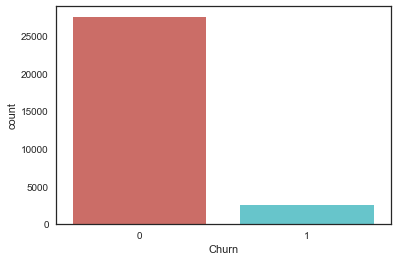

In [204]:
sns.countplot(x=Churn_df.Churn,data=Churn_df, palette='hls')
plt.show()

In [205]:
Churn_df.Churn.value_counts()

0    27532
1     2435
Name: Churn, dtype: int64

### We have a hugely imbalanced dataset!!

## Over-sampling using SMOTE

In [206]:
Churn_df = Churn_df.fillna(0)

# delete columns with all 0
Churn_df = Churn_df.loc[:, (Churn_df != 0).any(axis=0)]


In [207]:
Churn_df.index = Churn_df['mobile_number']
list1 = ['mobile_number']
Churn_df = Churn_df.drop(list1,axis = 1 )

In [208]:
list = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7',
'date_of_last_rech_8','circle_id']
smote_df = Churn_df.drop(list,axis = 1 )
Churn_df1 = Churn_df.drop(list,axis = 1 )

In [209]:
X = smote_df.loc[:, smote_df.columns != 'Churn']
y = smote_df.loc[:, smote_df.columns == 'Churn']

In [210]:
#!pip install -U imbalanced-learn --> # Uncomment this if imblearn is not installed previously

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0,ratio = 1.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

bal_x_train,bal_y_train =os.fit_sample(X_train, y_train)
bal_x_train = pd.DataFrame(data=bal_x_train,columns=columns )
bal_y_train= pd.DataFrame(data=bal_y_train,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(bal_x_train))
print("Number of no churn in oversampled data",len(bal_y_train[bal_y_train['y']==0]))
print("Number of churn",len(bal_x_train[bal_y_train['y']==1]))
print("Proportion of no churn data in oversampled data is ",len(bal_y_train[bal_y_train['y']==0])/len(bal_x_train))
print("Proportion of churn data in oversampled data is ",len(bal_y_train[bal_y_train['y']==1])/len(bal_x_train))

length of oversampled data is  38526
Number of no churn in oversampled data 19263
Number of churn 19263
Proportion of no churn data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


In [211]:
#create dummies
bal_x_train=pd.get_dummies(bal_x_train)
X_test=pd.get_dummies(X_test)
bal_x_train.shape

(38526, 90)

# Dimensionality Reduction using PCA 

In [212]:
#standardizing values
bal_x_train = (bal_x_train-bal_x_train.mean())/bal_x_train.std()


In [213]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [214]:
#Doing the PCA on the train data
bal_x_train = bal_x_train.fillna(0)
pca.fit(bal_x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [215]:
pca.components_

array([[-6.37474265e-03,  2.47800804e-02,  6.07638261e-02, ...,
         2.15852886e-02,  2.55343577e-02,  1.33164232e-02],
       [ 1.82170485e-01,  2.17267031e-01,  2.09487244e-01, ...,
         4.13373661e-02,  4.52852732e-02,  2.89024549e-02],
       [ 2.27020896e-02,  1.37920760e-01,  1.87852249e-01, ...,
         1.32139984e-01,  1.42187417e-01,  9.48102980e-02],
       ...,
       [ 0.00000000e+00, -4.51344000e-17, -3.85937170e-16, ...,
         3.10408411e-01,  1.16750047e-01, -4.83012971e-01],
       [ 0.00000000e+00,  2.89707080e-16, -8.90405774e-17, ...,
         3.55673304e-01, -3.51566295e-02, -3.73870846e-01],
       [-0.00000000e+00,  3.98553954e-18,  1.36119712e-16, ...,
        -1.39959106e-01,  4.20958127e-01, -2.85658881e-01]])

In [216]:
colnames =(bal_x_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,Feature,PC1,PC2
0,arpu_6,-0.006375,0.182170
1,arpu_7,0.024780,0.217267
2,arpu_8,0.060764,0.209487
3,onnet_mou_6,-0.073532,0.105997
4,onnet_mou_7,-0.064867,0.130251
5,onnet_mou_8,-0.036326,0.129601
6,offnet_mou_6,-0.065396,0.140106
7,offnet_mou_7,-0.053810,0.165445
8,offnet_mou_8,-0.016702,0.167481
9,roam_ic_mou_6,-0.007638,0.058685


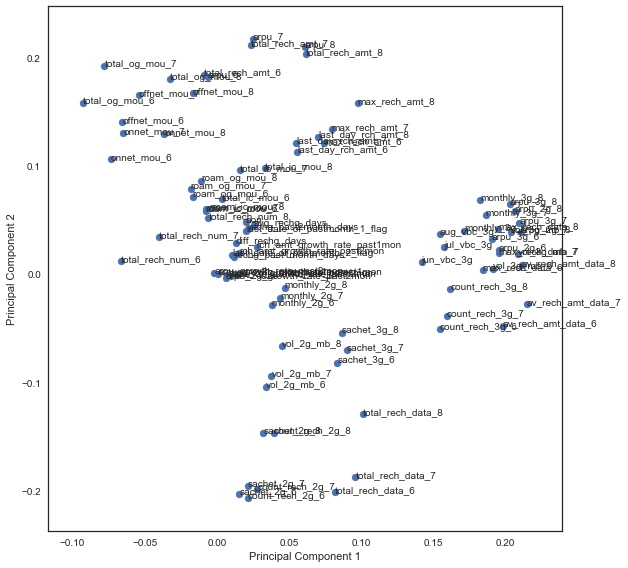

In [217]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [218]:
pca.explained_variance_ratio_

array([1.59084184e-01, 1.07491480e-01, 7.30545558e-02, 5.11211342e-02,
       4.13574191e-02, 3.80844621e-02, 3.06266974e-02, 2.95129231e-02,
       2.72409200e-02, 2.62781012e-02, 2.37296956e-02, 2.32233563e-02,
       2.10203334e-02, 2.05313411e-02, 1.70999910e-02, 1.65483907e-02,
       1.43934541e-02, 1.31551872e-02, 1.26163731e-02, 1.14667458e-02,
       1.14219859e-02, 1.11922836e-02, 1.10416157e-02, 1.09972575e-02,
       1.06983543e-02, 1.03298465e-02, 9.92939980e-03, 9.52110431e-03,
       9.48488696e-03, 9.36388846e-03, 8.58663005e-03, 8.01977046e-03,
       7.16155369e-03, 6.90689387e-03, 6.43054492e-03, 6.21655074e-03,
       6.01288659e-03, 5.49750171e-03, 5.33839655e-03, 5.16586897e-03,
       4.84010383e-03, 4.77561149e-03, 4.49989265e-03, 3.91331964e-03,
       3.70409443e-03, 3.58494605e-03, 3.50933831e-03, 3.43886090e-03,
       3.37251681e-03, 3.10049843e-03, 2.85477154e-03, 2.84578575e-03,
       2.53489567e-03, 2.39270834e-03, 2.15842497e-03, 1.82813349e-03,
      

In [219]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([15.91, 26.66, 33.97, 39.08, 43.22, 47.03, 50.09, 53.04, 55.76,
       58.39, 60.76, 63.08, 65.18, 67.23, 68.94, 70.59, 72.03, 73.35,
       74.61, 75.76, 76.9 , 78.02, 79.12, 80.22, 81.29, 82.32, 83.31,
       84.26, 85.21, 86.15, 87.01, 87.81, 88.53, 89.22, 89.86, 90.48,
       91.08, 91.63, 92.16, 92.68, 93.16, 93.64, 94.09, 94.48, 94.85,
       95.21, 95.56, 95.9 , 96.24, 96.55, 96.84, 97.12, 97.37, 97.61,
       97.83, 98.01, 98.18, 98.35, 98.51, 98.66, 98.81, 98.95, 99.08,
       99.21, 99.33, 99.43, 99.52, 99.6 , 99.68, 99.75, 99.8 , 99.85,
       99.89, 99.93, 99.96, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98])

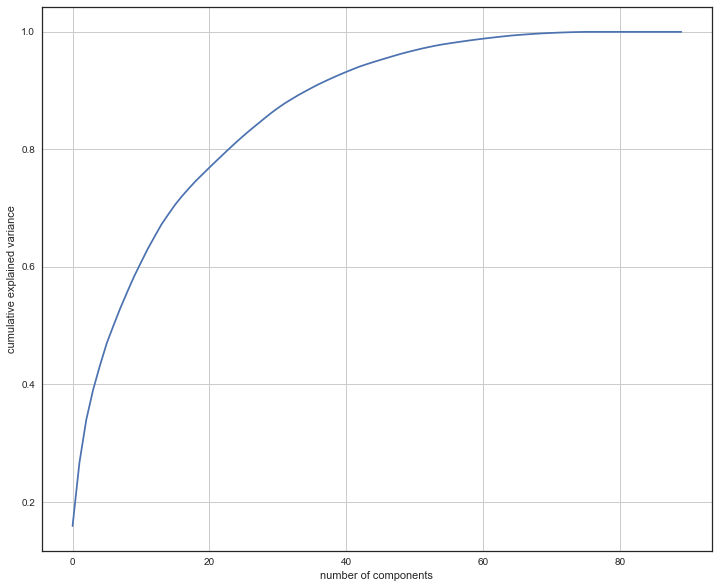

In [220]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

##### We find that 37 variables can explain more than 91% of the variance in the dataset. So we chose to proceed with 37 variables.

In [226]:
#incremental PCA 
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=37)
n_components = 37

In [227]:
xtrain_pca = pca_final.fit_transform(bal_x_train)
xtrain_pca.shape

(38526, 37)

In [228]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(xtrain_pca.transpose())

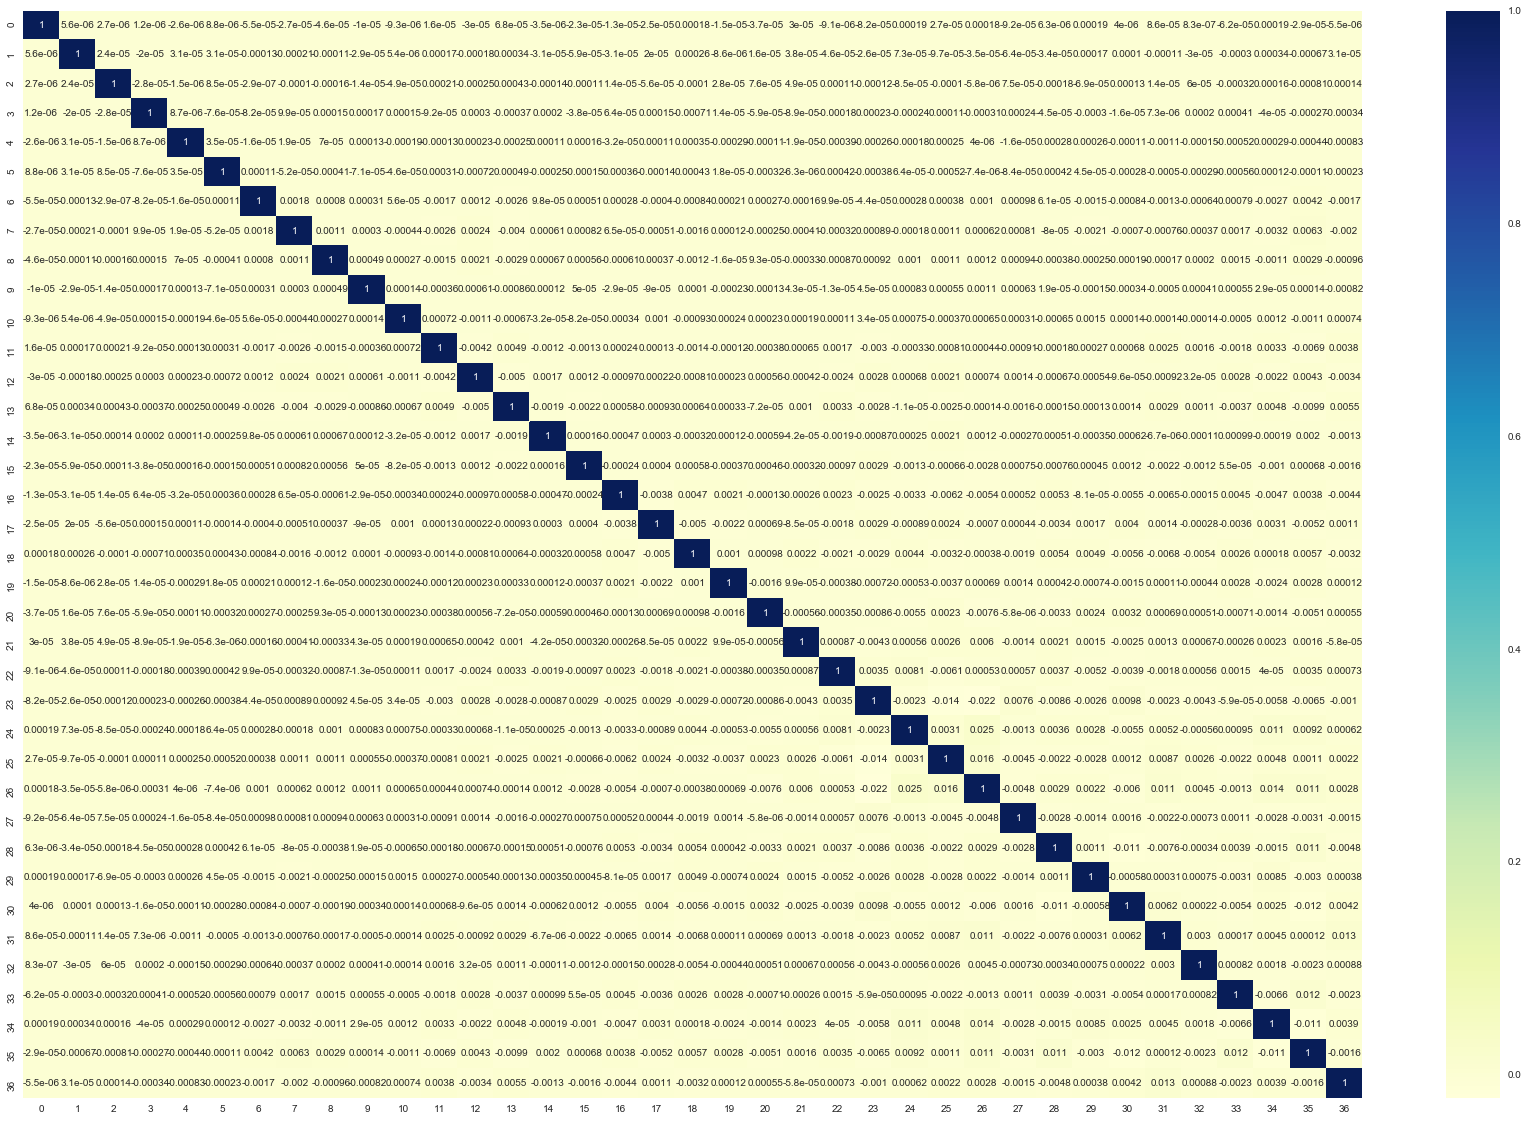

In [229]:
#plotting the correlation matrix to show that there are no variables that are highly correlated
%matplotlib inline
plt.figure(figsize = (30,20))
sns.heatmap(corrmat,cmap="YlGnBu",annot = True)

In [230]:
xtest_pca = pca_final.fit_transform(X_test)
xtest_pca.shape

(8991, 37)

### We find that 37 variables can explain about 91% of the variance in the dataset. But for final model need to reduce features further to achieve good accuracy.So to reduce feature further instead of PCA need to switch on Ensemble technique for feature selection.Because in PCA will loose some data points but in ensemble tree based approach can give better results

# Model Building 

# Model 1: Logistic Regression using variables from PCA

In [231]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
model_pca = logreg.fit(xtrain_pca,bal_y_train)

In [232]:
y_pred = logreg.predict(xtest_pca)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(xtest_pca, y_test)))

Accuracy of logistic regression classifier on test set: 0.50


In [233]:
# Accuracy is very low, so run PCA again to explain 95% variance in the dataset
pca_again = PCA(0.95)

In [234]:
xtrain_pca2 = pca_again.fit_transform(bal_x_train)
xtrain_pca2.shape
# we see that PCA selected 46 components

(38526, 46)

In [235]:
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(xtrain_pca2,bal_y_train)
xtest_pca2 = pca_again.transform(X_test)
xtest_pca2.shape

(8991, 46)

In [236]:
#Making prediction on the test data
pred_probs_train = model_pca2.predict_proba(xtrain_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(bal_y_train, pred_probs_train))

'0.90'

In [237]:
pred_probs_test = model_pca2.predict_proba(xtest_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.81'

In [238]:
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(xtrain_pca2,bal_y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

[False False  True  True  True False False  True False False False  True
 False False  True False False False False  True False False False  True
 False False  True False False False False False False  True False False
 False False  True False False False False False  True  True]
[ 2  8  1  1  1 26 18  1 27 28 22  1 15  7  1 13 12 29 33  1 24 25 30  1
  3  6  1  5 32 19 23  4 17  1  9 20 34 11  1 16 21 14 10 31  1  1]


In [239]:
train_pca_df = pd.DataFrame(xtrain_pca2)
#cols = [2,3,4,7,11,20,25,26,32,46]
cols = [2,3,4,7,11,14,19,23,26,33,38,44,45]
#cols = [0,2,3,4,7,11,14,20,25,26,32,34,39,45,46]
X=train_pca_df[cols]
y=bal_y_train

In [240]:
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_lr_train, y_lr_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [241]:
y_pred = logreg.predict(X_lr_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_lr_test, y_lr_test)))
print(classification_report(y_lr_test,y_pred))

Accuracy of logistic regression classifier on test set: 0.79
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      5755
           1       0.79      0.80      0.79      5803

   micro avg       0.79      0.79      0.79     11558
   macro avg       0.79      0.79      0.79     11558
weighted avg       0.79      0.79      0.79     11558



In [242]:
pred_probs_test = logreg.predict_proba(X_lr_test)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_lr_test, pred_probs_test))

'0.86'

In [243]:
pred_probs_train = logreg.predict_proba(X_lr_train)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_lr_train, pred_probs_train))

'0.86'

### These are the shortcomings of Logistic regression model using variables from PCA:
1) It is highly overfitted. It gives the exact same ROC_AUC for training and test data.

2) It does not tell us which are the driver variables since it uses the principal components from PCA.

# Model 2 : XGBOOST with Balanced Data

In [244]:
!pip install xgboost
import xgboost as xgb

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [245]:
XGB = xgb.XGBRegressor(n_estimators=1000)
XGB.fit(bal_x_train, bal_y_train, early_stopping_rounds=2, eval_set=[(X_test, y_test)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [246]:
train_y_pred = XGB.predict(bal_x_train)

auc = roc_auc_score(bal_y_train, train_y_pred)
print("Performance for train : ", auc)

Performance for train :  0.9639001452607117


In [247]:
test_y_pred = XGB.predict(X_test)
auc = roc_auc_score(y_test, test_y_pred)
print("Performance for test : ", auc)

Performance for test :  0.8540637042064461


Above AUC score shows that training accuracy is high, but test accuracy is low which means 
it is likely that we have overfitting issue

# Tuning XGBoost

In [248]:
#Tuning scale pos weight 

In [337]:

scale_pos_weight = [1,5,10,20,25,30,35,40,50,60]
for i in scale_pos_weight:
    print('-----------------------------------------------------')
    print('scale_pos_weight = {}: '.format(i))
    clf = xgb.XGBClassifier(scale_pos_weight=i)
    clf.fit(bal_x_train, bal_y_train)
    predict_test = clf.predict(X_test)
    predict_train = clf.predict(bal_x_train)
    proba = clf.predict_proba(X_test)
    cm_test = confusion_matrix(y_test, predict_test)
    cm_train = confusion_matrix(bal_y_train, predict_train)
    auc_train = roc_auc_score(bal_y_train, predict_train)
    auc_test = roc_auc_score(y_test, predict_test)
    print('Accuracy Score')
    print(accuracy_score(y_test, predict_test))
    print('Confusion Matrix-train: \n', cm_train)
    print('AUC-train: \n', auc_train)
    print('Confusion Matrix-test: \n', cm_test)
    print('AUC-test: \n', auc_test)
    print('Specificity : %', round(100 * (cm_test[0][0]/(cm_test[0][0]+cm_test[0][1]))))
    print('Sensitivity-Recall : %', round(100* (cm_test[1][1]/(cm_test[1][0]+cm_test[1][1]))))
    print(classification_report(y_test,predict_test))
    print('-----------------------------------------------------')

-----------------------------------------------------
scale_pos_weight = 1: 
Accuracy Score
0.47414080747414084
Confusion Matrix-train: 
 [[18180  1083]
 [  981 18282]]
AUC-train: 
 0.946425790375331
Confusion Matrix-test: 
 [[3594 4675]
 [  53  669]]
AUC-test: 
 0.6806140914787366
Specificity : % 43.0
Sensitivity-Recall : % 93.0
              precision    recall  f1-score   support

           0       0.99      0.43      0.60      8269
           1       0.13      0.93      0.22       722

   micro avg       0.47      0.47      0.47      8991
   macro avg       0.56      0.68      0.41      8991
weighted avg       0.92      0.47      0.57      8991

-----------------------------------------------------
-----------------------------------------------------
scale_pos_weight = 5: 
Accuracy Score
0.33578022466911356
Confusion Matrix-train: 
 [[16031  3232]
 [  234 19029]]
AUC-train: 
 0.910034781705861
Confusion Matrix-test: 
 [[2342 5927]
 [  45  677]]
AUC-test: 
 0.6104498194203294
Spec

#### Above results clearly shows as we change value scale_post_weight result change drastically.As in this case tagging a true chrurn is more important that tagging a non churn as churn. so instead of f1_score , recall value is more important for model selection so as per above results scale_post_weight = 60 gives better result than any other value bcause auc-train and auc-test are inline and as well as recall value for churn is 79% which is statistically good value 

# Model 3 Gradient Boosting Model with balanced data

In [250]:
param_grid = {"learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [251]:
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [252]:
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'accuracy', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(bal_x_train,bal_y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  5.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.2, 0.6, 0.9], 'subsample': [0.3, 0.6, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [254]:
cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_subsample,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,8.901965,0.068099,0.943986,0.959741,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",5,0.912163,0.982986,0.961143,0.950008,0.958651,0.946231,0.388269,0.014628,0.022525,0.016508
1,14.807433,0.056638,0.948009,0.965400,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",1,0.909671,0.984971,0.967996,0.956354,0.966360,0.954875,0.648978,0.008706,0.027117,0.013852
2,16.751270,0.102627,0.947204,0.965828,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",2,0.908348,0.986684,0.967373,0.956043,0.965893,0.954758,1.233780,0.040857,0.027483,0.014757
3,8.446734,0.054535,0.935836,0.955614,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",8,0.901184,0.979014,0.952344,0.943116,0.953979,0.944713,0.180188,0.008571,0.024512,0.016559
4,12.926261,0.056997,0.942610,0.976665,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",6,0.887634,0.998949,0.970020,0.964336,0.970176,0.966711,0.133153,0.007092,0.038874,0.015787


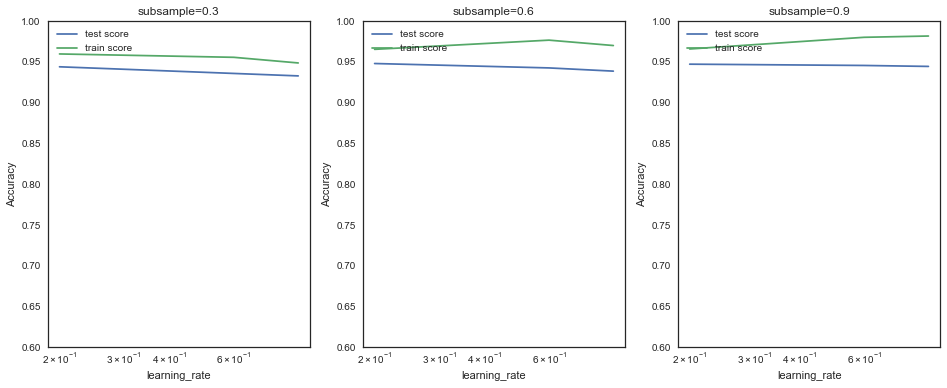

In [255]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('Accuracy')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


In [256]:
#From above plot it is observed that learning rate "0.2" is best with "0.6" subsample giving "95%" accuracy, So fitting with these values
folds = 3
param_grid = {"learning_rate": [0.2],
              "subsample": [0.6]
             }
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                            param_grid= param_grid,
                               scoring = 'accuracy', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(bal_x_train,bal_y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   41.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.2], 'subsample': [0.6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [257]:
# predict
predictions_test_GBC = grid_search_GBC.predict(X_test)
print(classification_report(y_test,predictions_test_GBC))

              precision    recall  f1-score   support

           0       0.97      0.41      0.58      8269
           1       0.11      0.87      0.20       722

   micro avg       0.45      0.45      0.45      8991
   macro avg       0.54      0.64      0.39      8991
weighted avg       0.90      0.45      0.55      8991



In [259]:

confusion = metrics.confusion_matrix( y_test,predictions_test_GBC )
confusion

array([[3381, 4888],
       [  96,  626]], dtype=int64)

In [261]:
metrics.accuracy_score( y_test, predictions_test_GBC )

0.44566789011233454

In [262]:
train_y_pred = grid_search_GBC.predict(bal_x_train)

auc = roc_auc_score(bal_y_train, train_y_pred)
print("Performance for train : ", auc)

Performance for train :  0.9611431241239683


In [263]:
test_y_pred = grid_search_GBC.predict(X_test)

auc = roc_auc_score(y_test, test_y_pred)
print("Performance for test : ", auc)

Performance for test :  0.6379562689335632


### There are 2 problems with this model:
1) We need to predict maximum churn correctly but above model is predicting non churn more correctly i.e. sensitivity of model is low.

2) ROC_AUC score for training data is much higher than that of test data, so there is overfitting

# Model 4 Random Forest Model with balanced data

## Let's first fit a random forest model with default hyperparameters.

In [264]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [265]:
# fit
rfc.fit(bal_x_train,bal_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [266]:
# Making predictions
predictions = rfc.predict(X_test)

In [267]:
# Let's check the report of our churn model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.61      0.73      8269
           1       0.08      0.41      0.14       722

   micro avg       0.59      0.59      0.59      8991
   macro avg       0.50      0.51      0.44      8991
weighted avg       0.85      0.59      0.68      8991



In [268]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[5020 3249]
 [ 423  299]]


In [269]:
print(accuracy_score(y_test,predictions))

0.5915915915915916


In [270]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(bal_x_train, bal_y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

so far model looks good now we will tune the hyperparameters to improve model performance.

## Hyperparameter Tuning

Tuning max_depth

Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [271]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.278177,0.005627,0.818486,0.819986,2,{'max_depth': 2},4,0.810407,0.822485,0.817804,0.819143,0.868284,0.861648,0.793094,0.795730,0.802830,0.800921,0.015396,0.003179,0.026213,0.023214
1,0.841527,0.015849,0.908711,0.918120,7,{'max_depth': 7},3,0.885025,0.924594,0.911108,0.912459,0.916169,0.917846,0.915109,0.915515,0.916147,0.920187,0.102859,0.000182,0.011989,0.004125
2,1.387936,0.021599,0.944972,0.972888,12,{'max_depth': 12},2,0.919543,0.977969,0.953024,0.973621,0.951207,0.968462,0.951843,0.973720,0.949247,0.970670,0.149113,0.005426,0.012774,0.003211
3,1.693050,0.024732,0.953771,0.990493,17,{'max_depth': 17},1,0.925642,0.990299,0.962756,0.990947,0.961329,0.991661,0.960280,0.990267,0.958853,0.989293,0.079754,0.004794,0.014123,0.000787


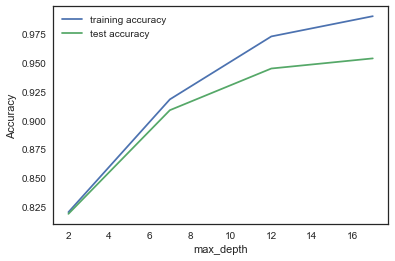

In [272]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As we increase the value of max_depth, both train and test scores increase the ensemble tries to overfit as we increase the max_depth.Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.



## Tuning n_estimators

In [273]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(bal_x_train, bal_y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [274]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,4.970571,0.059899,0.883455,0.885584,100,{'n_estimators': 100},3,0.867117,0.891434,0.887490,0.883582,0.889437,0.882641,0.890447,0.884855,0.882788,0.885407,0.223618,0.015937,0.008583,0.003081
1,23.380786,0.312997,0.883741,0.885214,500,{'n_estimators': 500},2,0.866468,0.889747,0.886582,0.883809,0.892162,0.883842,0.889148,0.883492,0.884346,0.885179,0.803149,0.049376,0.009022,0.002340
2,42.422943,0.505061,0.883352,0.885817,900,{'n_estimators': 900},4,0.867376,0.890947,0.885025,0.884004,0.891383,0.883582,0.888370,0.885115,0.884605,0.885439,1.549618,0.020081,0.008358,0.002655
3,58.785966,0.722330,0.884156,0.886427,1300,{'n_estimators': 1300},1,0.866597,0.891077,0.886841,0.884458,0.891773,0.883939,0.889798,0.886023,0.885774,0.886639,1.630215,0.060557,0.009033,0.002526


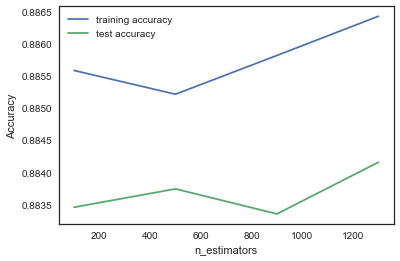

In [275]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [276]:
#the training increase with increase in max_features but at certain point starts decreasing

In [277]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [278]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_features,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.123689,0.009593,0.934830,0.937452,4,{'max_features': 4},5,0.936845,0.938200,0.928742,0.934327,0.940419,0.941955,0.933238,0.932845,0.934907,0.939936,0.016341,0.005401,0.003871,0.003406
1,0.222179,0.007212,0.939979,0.940432,8,{'max_features': 8},4,0.938751,0.939631,0.937083,0.941776,0.938513,0.938379,0.945160,0.939638,0.940391,0.942736,0.030901,0.002973,0.002795,0.001588
2,0.361492,0.006395,0.941362,0.943161,14,{'max_features': 14},3,0.941134,0.940763,0.939943,0.945888,0.940419,0.944517,0.943729,0.939399,0.941583,0.945239,0.053041,0.004077,0.001312,0.002588
3,0.463693,0.008731,0.943078,0.944723,20,{'max_features': 20},1,0.944471,0.943564,0.939466,0.945709,0.943518,0.945292,0.948498,0.943034,0.939437,0.946014,0.033469,0.005204,0.003400,0.001196
4,0.509282,0.006322,0.942887,0.945092,24,{'max_features': 24},2,0.945424,0.945530,0.937321,0.944756,0.943041,0.945054,0.949690,0.944226,0.938960,0.945894,0.056135,0.005855,0.004453,0.000583


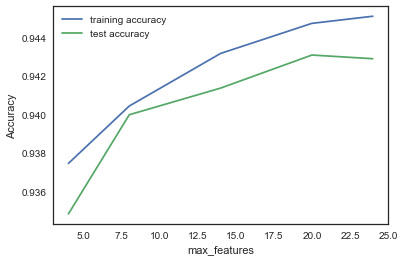

In [279]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [280]:
#Tuning min_samples_leaf

In [281]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(bal_x_train, bal_y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [282]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.924520,0.008731,0.899133,0.906563,100,{'min_samples_leaf': 100},1,0.878536,0.912557,0.905269,0.906067,0.908772,0.903829,0.902388,0.905198,0.900701,0.905165,0.035064,0.007265,0.010657,0.003081
1,0.887156,0.016806,0.893942,0.898328,150,{'min_samples_leaf': 150},2,0.876460,0.909215,0.896444,0.893219,0.904620,0.896885,0.900052,0.896308,0.892134,0.896016,0.057949,0.003917,0.009660,0.005588
2,0.940663,0.014317,0.890074,0.894013,200,{'min_samples_leaf': 200},3,0.873086,0.903277,0.897482,0.895068,0.894108,0.887281,0.892653,0.890338,0.893043,0.894102,0.126065,0.001899,0.008663,0.005399
3,0.827008,0.015940,0.886726,0.888854,250,{'min_samples_leaf': 250},4,0.863872,0.889358,0.887490,0.884912,0.898131,0.890558,0.894860,0.888035,0.889278,0.891409,0.073578,0.004383,0.012047,0.002276
4,0.824375,0.018370,0.885765,0.888556,300,{'min_samples_leaf': 300},5,0.869452,0.894387,0.883727,0.882252,0.887490,0.882544,0.895509,0.891733,0.892653,0.891863,0.094080,0.004038,0.009117,0.005117


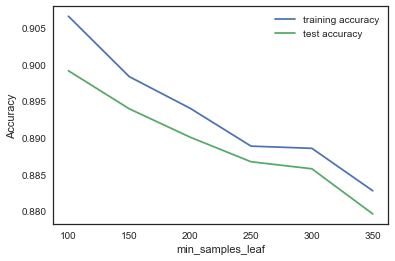

In [283]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [284]:
#the model starts of accuracy starts decreasing as the value of min_samples_leaf increase

In [285]:
#Tuning min_samples_split

In [286]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(bal_x_train,bal_y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [287]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.387057,0.019182,0.916446,0.928879,200,{'min_samples_split': 200},1,0.892162,0.935626,0.921749,0.925860,0.922917,0.926898,0.926791,0.927649,0.918614,0.928363,0.130905,0.005835,0.012422,0.003474
1,1.224097,0.022117,0.911800,0.921267,250,{'min_samples_split': 250},2,0.885544,0.925698,0.918375,0.917618,0.917726,0.920084,0.922378,0.923237,0.914979,0.919700,0.032146,0.008084,0.013340,0.002852
2,1.318157,0.019850,0.908400,0.917134,300,{'min_samples_split': 300},3,0.883727,0.927677,0.919024,0.915120,0.914093,0.914796,0.909917,0.910713,0.915239,0.917364,0.047756,0.005181,0.012674,0.005691
3,1.249523,0.019203,0.906816,0.913734,350,{'min_samples_split': 350},4,0.883727,0.920993,0.918246,0.915412,0.913185,0.908339,0.914330,0.912562,0.904595,0.911362,0.109988,0.003093,0.012375,0.004281
4,1.273699,0.016803,0.902949,0.909490,400,{'min_samples_split': 400},6,0.877758,0.914990,0.909421,0.906035,0.909940,0.906619,0.914200,0.910778,0.903427,0.909026,0.107003,0.003923,0.013056,0.003234


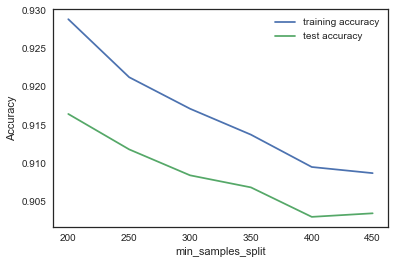

In [288]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [310]:
# Created the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 300),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [302]:
# Fit the grid search to the data
grid_search.fit(bal_x_train,bal_y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  6.0min finished


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\NP0054~1\\AppData\\Local\\Temp\\joblib_memmapping_folder_3856_4436631415\\3856-1841291174128-3595d4bdd25140148b25e4ba1241664d.pkl'

In [291]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

## Fitting the model with the best parameters obtained from grid search using Random Forest

In [303]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [304]:
# fit
rfc.fit(bal_x_train,bal_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [305]:
# predict
predictions = rfc.predict(X_test)

In [306]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      8269
           1       0.52      0.25      0.34       722

   micro avg       0.92      0.92      0.92      8991
   macro avg       0.73      0.62      0.65      8991
weighted avg       0.90      0.92      0.91      8991



In [311]:
print(confusion_matrix(y_test,predictions))

[[8102  167]
 [ 538  184]]


In [312]:
#selected top 10 variable based on random forest

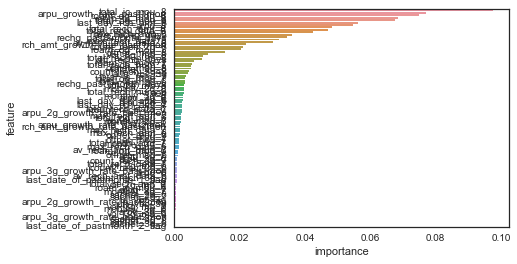

In [313]:
indices = np.argsort(rfc.feature_importances_)[::-1]

feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(bal_x_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         bal_x_train.columns[indices[f]],
                    rfc.feature_importances_[indices[f]]]

sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [314]:
print(feature_rank)
feature_rank.to_csv('feature_rank_gb.csv', sep=',', encoding = 'utf-8')

   rank                        feature    importance
0     1                 total_ic_mou_8  9.754284e-02
1     2      arpu_growth_rate_past1mon  7.711344e-02
2     3                  roam_og_mou_8  7.499003e-02
3     4                  roam_ic_mou_8  6.840940e-02
4     5                 total_og_mou_8  6.763455e-02
5     6             last_day_rch_amt_8  5.613796e-02
6     7                         arpu_8  5.484176e-02
7     8               total_rech_amt_8  4.817178e-02
8     9              total_rech_data_8  4.702654e-02
9    10                 max_rech_amt_8  4.259421e-02
10   11                 avg_rechg_days  3.617005e-02
11   12          rechg_past2month_days  3.469776e-02
12   13                max_rech_data_8  3.211337e-02
13   14             av_rech_amt_data_8  3.016346e-02
14   15   rch_amt_growth_rate_past1mon  2.204182e-02
15   16                count_rech_2g_8  2.114363e-02
16   17                  roam_og_mou_7  2.049731e-02
17   18                   offnet_mou_8  1.5640

Top 10 variable based on random forest model are
   rank                        feature  importance
0     1                 total_ic_mou_8    0.110931
1     2                  roam_og_mou_8    0.083333
2     3                  roam_ic_mou_8    0.078923
3     4               total_rech_amt_8    0.070045
4     5      arpu_growth_rate_past1mon    0.067776
5     6                         arpu_8    0.067543
6     7             last_day_rch_amt_8    0.065512
7     8                 avg_rechg_days    0.046801
8     9              total_rech_data_8    0.045540
9    10                 total_og_mou_8    0.041085


In [318]:
#Keep top 10 variable in the dataframe and rerun the random forest model
columns = [
'total_ic_mou_8','arpu_growth_rate_past1mon',
'roam_og_mou_8',
'roam_ic_mou_8','total_og_mou_8',
'last_day_rch_amt_8','arpu_8','total_rech_amt_8',
'total_rech_data_8',
'max_rech_amt_8'
]

In [319]:
# fit
rfc1=rfc.fit(bal_x_train[columns],bal_y_train)

In [320]:
# predict
predictions_test = rfc1.predict(X_test[columns])

In [321]:
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8269
           1       0.70      0.42      0.53       722

   micro avg       0.94      0.94      0.94      8991
   macro avg       0.83      0.70      0.75      8991
weighted avg       0.93      0.94      0.93      8991



In [322]:
print(accuracy_score(y_test,predictions_test))

0.939161383605828


In [323]:
print(confusion_matrix(y_test,predictions_test))

[[8138  131]
 [ 416  306]]


In [324]:
train_y_pred = rfc1.predict(bal_x_train[columns])

auc = roc_auc_score(bal_y_train, train_y_pred)
print("Performance for train : ", auc)

Performance for train :  0.8934226236827079


In [325]:
test_y_pred = rfc1.predict(X_test[columns])

auc = roc_auc_score(y_test, test_y_pred)
print("Performance for test : ", auc)

Performance for test :  0.7039902060527773


### These are the problems with the random forest model:
1) The recall for 1 (sensitivity) is  low at 0.42. So churned customers are not predicted correctly.

2) ROC_AUCscore for train data is 89.3% and test data is 70%. This indicates overfitting of data.

# Final Model Select

#### The xgboost,gradient boosting,random forest and logistic regresssion are compared above. The best recall value comes from xgboost. Also, the ROC_AUC score for train and test data is almost the same which means that there is no overfitting. So xgboost will be our final model for 9th month prediction.

In [327]:
scale_pos_weight = [60]
for i in scale_pos_weight:
    print('-----------------------------------------------------')
    clf = xgb.XGBClassifier(scale_pos_weight=i)
    clf.fit(bal_x_train, bal_y_train)
    predict_test = clf.predict(X_test)
    predict_train = clf.predict(bal_x_train)
    proba = clf.predict_proba(X_test)
    cm_test = confusion_matrix(y_test, predict_test)
    cm_train = confusion_matrix(bal_y_train, predict_train)
    auc_train = roc_auc_score(bal_y_train, predict_train)
    auc_test = roc_auc_score(y_test, predict_test)
    print('Accuracy Score')
    print(accuracy_score(y_test, predict_test))
    print('Confusion Matrix-train: \n', cm_train)
    print('AUC-train: \n', auc_train)
    print('Confusion Matrix-test: \n', cm_test)
    print('AUC-test: \n', auc_test)
    print('Specificity : %', round(100 * (cm_test[0][0]/(cm_test[0][0]+cm_test[0][1]))))
    print('Sensitivity-Recall : %', round(100* (cm_test[1][1]/(cm_test[1][0]+cm_test[1][1]))))
    print(classification_report(y_test,predict_test))
    print('-----------------------------------------------------')

-----------------------------------------------------
Accuracy Score
0.6330775219664109
Confusion Matrix-train: 
 [[ 8998 10265]
 [   11 19252]]
AUC-train: 
 0.7332710377407465
Confusion Matrix-test: 
 [[5121 3148]
 [ 151  571]]
AUC-test: 
 0.7050798647553573
Specificity : % 62.0
Sensitivity-Recall : % 79.0
              precision    recall  f1-score   support

           0       0.97      0.62      0.76      8269
           1       0.15      0.79      0.26       722

   micro avg       0.63      0.63      0.63      8991
   macro avg       0.56      0.71      0.51      8991
weighted avg       0.91      0.63      0.72      8991

-----------------------------------------------------


In [328]:
# Final variables for models

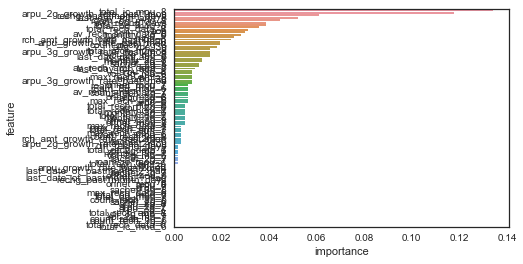

In [329]:
indices = np.argsort(clf.feature_importances_)[::-1]

feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(bal_x_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         bal_x_train.columns[indices[f]],
                clf.feature_importances_[indices[f]]]

sns.barplot( y = 'feature', x = 'importance', data = feature_rank)

In [330]:
print(feature_rank)
feature_rank.to_csv('feature_rank_xgboost.csv', sep=',', encoding = 'utf-8')

   rank                        feature  importance
0     1                 total_ic_mou_8    0.134128
1     2   arpu_2g_growth_rate_past1mon    0.117735
2     3          rechg_past2month_days    0.061103
3     4             last_day_rch_amt_8    0.052161
4     5                  roam_og_mou_8    0.044709
5     6                 avg_rechg_days    0.038748
6     7                 total_og_mou_8    0.038748
7     8              total_rech_data_8    0.035768
8     9                            aon    0.031297
9    10             av_rech_amt_data_8    0.029806
10   11                   monthly_2g_6    0.028316
11   12                  roam_ic_mou_8    0.025335
12   13   rch_amt_growth_rate_past1mon    0.023845
13   14      arpu_growth_rate_past1mon    0.019374
14   15                count_rech_2g_8    0.019374
15   16                     aug_vbc_3g    0.017884
16   17               total_rech_num_8    0.014903
17   18   arpu_3g_growth_rate_past2mon    0.014903
18   19                    vol_

# Top 15 variables used in xgboost model

   rank                        feature  importance
0     1                 total_ic_mou_8    0.134128
1     2   arpu_2g_growth_rate_past1mon    0.117735
2     3          rechg_past2month_days    0.061103
3     4             last_day_rch_amt_8    0.052161
4     5                  roam_og_mou_8    0.044709
5     6                 avg_rechg_days    0.038748
6     7                 total_og_mou_8    0.038748
7     8              total_rech_data_8    0.035768
8     9                            aon    0.031297
9    10             av_rech_amt_data_8    0.029806
10   11                   monthly_2g_6    0.028316
11   12                  roam_ic_mou_8    0.025335
12   13   rch_amt_growth_rate_past1mon    0.023845
13   14      arpu_growth_rate_past1mon    0.019374
14   15                count_rech_2g_8    0.019374

# Final XG Boost model balanced data and top 15 driver variables that determine churn

In [340]:
#Keep top 15 variable in the dataframe and rerun the XG Boost model
columns = [
'total_ic_mou_8',
'arpu_2g_growth_rate_past1mon',
'rechg_past2month_days',
'last_day_rch_amt_8',
'roam_og_mou_8',
'avg_rechg_days',
'total_og_mou_8',
'total_rech_data_8',
'aon',
'av_rech_amt_data_8',
'monthly_2g_6','roam_ic_mou_8','rch_amt_growth_rate_past1mon','arpu_growth_rate_past1mon','count_rech_2g_8'
]


In [339]:
scale_pos_weight = [60]
for i in scale_pos_weight:
    print('-----------------------------------------------------')
    clf = xgb.XGBClassifier(scale_pos_weight=i)
    clf.fit(bal_x_train[columns], bal_y_train)
    predict_test = clf.predict(X_test[columns])
    predict_train = clf.predict(bal_x_train[columns])
    proba = clf.predict_proba(X_test[columns])
    cm_test = confusion_matrix(y_test, predict_test)
    cm_train = confusion_matrix(bal_y_train, predict_train)
    auc_train = roc_auc_score(bal_y_train, predict_train)
    auc_test = roc_auc_score(y_test, predict_test)
    print('Accuracy Score')
    print(accuracy_score(y_test, predict_test))
    print('Confusion Matrix-train: \n', cm_train)
    print('AUC-train: \n', auc_train)
    print('Confusion Matrix-test: \n', cm_test)
    print('AUC-test: \n', auc_test)
    print('Specificity : %', round(100 * (cm_test[0][0]/(cm_test[0][0]+cm_test[0][1]))))
    print('Sensitivity-Recall : %', round(100* (cm_test[1][1]/(cm_test[1][0]+cm_test[1][1]))))
    print(classification_report(y_test,predict_test))
    print('-----------------------------------------------------')

-----------------------------------------------------
Accuracy Score
0.6989211433655879
Confusion Matrix-train: 
 [[ 9620  9643]
 [   16 19247]]
AUC-train: 
 0.7492861963349426
Confusion Matrix-test: 
 [[5688 2581]
 [ 126  596]]
AUC-test: 
 0.7566775618578753
Specificity : % 69.0
Sensitivity-Recall : % 83.0
              precision    recall  f1-score   support

           0       0.98      0.69      0.81      8269
           1       0.19      0.83      0.31       722

   micro avg       0.70      0.70      0.70      8991
   macro avg       0.58      0.76      0.56      8991
weighted avg       0.91      0.70      0.77      8991

-----------------------------------------------------


# Predict Month-9 data using Final selected model

In [341]:
# using all data from 9th month which we filtered in df already and creating derived colums used for prediction
#We will use top10 columns which we got as major driver variables to perform prediction for 9th month. 
Prediction_df.head()

,last_date_of_month_9,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,sep_vbc_3g
0,9/30/2014,21.100,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,6,0,0,9/28/2014,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,0,3.58
7,9/30/2014,500.000,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,3,0,0,9/30/2014,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0.00
8,9/30/2014,166.787,33.46,108.71,0.0,0.0,26.13,34.58,0.00,0.00,60.71,7.33,74.13,0.00,0.0,81.46,0.0,0.00,0.0,142.18,4.03,17.34,0.00,21.38,0.00,13.53,0.0,0.0,13.53,34.91,0.0,0.0,0.0,15,186,36,9/30/2014,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0.00
21,9/30/2014,578.596,161.63,869.89,0.0,0.0,29.98,107.54,0.00,0.00,137.53,131.64,762.34,0.00,0.0,893.99,0.0,0.00,0.0,1031.53,17.99,113.46,8.41,139.88,16.74,95.98,0.0,0.0,112.73,252.61,0.0,0.0,0.0,17,680,50,9/30/2014,30,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0.00
23,9/30/2014,811.480,15.74,111.88,0.0,0.0,15.74,83.73,2.45,4.08,101.93,0.00,11.44,3.89,0.0,15.34,0.0,10.35,0.0,127.63,45.36,75.83,0.00,121.19,1.08,5.20,0.0,0.0,6.28,127.48,0.0,0.0,0.0,4,252,252,9/28/2014,0,1.0,252.0,0.0,1.0,252.0,13.93,314.74,212.17,0,0,1,0,0.00


In [342]:
Prediction_df.columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
       'arpu_3g_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3

In [359]:
# From our XGBoost model we have major driver variable listed below, we will create are derived colum for 9th month as well
Driver_columns_9 = [
'total_ic_mou_8',
'arpu_2g_growth_rate_past1mon',
'rechg_past2month_days',
'last_day_rch_amt_8',
'roam_og_mou_8',
'avg_rechg_days',
'total_og_mou_8',
'total_rech_data_8',
'aon',
'av_rech_amt_data_8',
'monthly_2g_6','roam_ic_mou_8','rch_amt_growth_rate_past1mon','arpu_growth_rate_past1mon','count_rech_2g_8'
]

In [363]:
Prediction_df['total_ic_mou_8']= Prediction_df['total_ic_mou_9']
Prediction_df['last_day_rch_amt_8']= Prediction_df['last_day_rch_amt_9']
Prediction_df['roam_og_mou_8']= Prediction_df['roam_og_mou_9']
Prediction_df['total_og_mou_8']= Prediction_df['total_og_mou_9']
Prediction_df['total_rech_data_8']= Prediction_df['total_rech_data_9']
Prediction_df['av_rech_amt_data_8']= Prediction_df['av_rech_amt_data_9']
Prediction_df['monthly_2g_6']= Prediction_df['monthly_2g_9']
Prediction_df['count_rech_2g_8']= Prediction_df['count_rech_2g_9']
Prediction_df['roam_ic_mou_8']= Prediction_df['roam_ic_mou_9']

In [368]:
#Creating derived column for 9th month
Prediction_df['arpu_2g_growth_rate_past1mon'] = ((raw_data.arpu_2g_9 - raw_data.arpu_2g_8)/ raw_data.arpu_2g_8)
Prediction_df['arpu_2g_growth_rate_past1mon'] = Prediction_df['arpu_2g_growth_rate_past1mon'].replace(np.inf, np.nan)
Prediction_df['rechg_past2month_days'] = (pd.to_datetime(df_final.date_of_last_rech_9) - pd.to_datetime(df_final.date_of_last_rech_8)).dt.days
Prediction_df['rechg_past1month_days'] = (pd.to_datetime(Churn_df.date_of_last_rech_8) - pd.to_datetime(Churn_df.date_of_last_rech_7)).dt.days
Prediction_df['rechg_past2month_days'] = (pd.to_datetime(df_final.date_of_last_rech_9) - pd.to_datetime(Churn_df.date_of_last_rech_8)).dt.days
Prediction_df['avg_rechg_days'] = ((Prediction_df.rechg_past1month_days + Prediction_df.rechg_past2month_days)/2)

Prediction_df['aon'] = Churn_df['aon']
Prediction_df['rch_amt_growth_rate_past1mon'] = ((df_final.last_day_rch_amt_9 - df_final.last_day_rch_amt_8)/ df_final.last_day_rch_amt_8)
Prediction_df['rch_amt_growth_rate_past1mon'] = Prediction_df['rch_amt_growth_rate_past1mon'].replace(np.inf, np.nan)

Prediction_df['arpu_growth_rate_past1mon'] = ((df_final.arpu_9 - df_final.arpu_7)/ df_final.arpu_7)
Prediction_df['mobile_number'] = df_final['mobile_number']

In [369]:
#Setting only final driver variables
predictions_9_df = Prediction_df[Driver_columns_9]

In [370]:
#Prediction using final model
Prediction_df['Churn'] = clf.predict(predictions_9_df)

In [367]:
Prediction_df.head()

,last_date_of_month_9,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,sep_vbc_3g,arpu_2g_growth_rate_past1mon_9,rechg_past2month_days_9,rechg_past1month_days_9,avg_rechg_days_9,aon_9,rch_amt_growth_rate_past1mon_9,arpu_growth_rate_past1mon_9,arpu_2g_growth_rate_past1mon,arpu_growth_rate_past1mon,rechg_past2month_days,rechg_past1month_days,avg_rechg_days,aon,rch_amt_growth_rate_past1mon,total_ic_mou_8,last_day_rch_amt_8,roam_og_mou_8,total_og_mou_8,total_rech_data_8,av_rech_amt_data_8,monthly_2g_6,count_rech_2g_8,roam_ic_mou_8,Churn
0,9/30/2014,21.100,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,6,0,0,9/28/2014,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,0,3.58,NaN,NaN,NaN,NaN,NaN,-1.0,-0.901776,NaN,-0.901776,NaN,NaN,NaN,NaN,-1.0,0.00,0,0.0,0.00,0.0,0.0,0,0.0,0.0,1
7,9/30/2014,500.000,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,3,0,0,9/30/2014,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,-1.0,-0.629588,NaN,-0.629588,NaN,NaN,NaN,NaN,-1.0,0.00,0,0.0,0.00,0.0,0.0,0,0.0,0.0,1
8,9/30/2014,166.787,33.46,108.71,0.0,0.0,26.13,34.58,0.00,0.00,60.71,7.33,74.13,0.00,0.0,81.46,0.0,0.00,0.0,142.18,4.03,17.34,0.00,21.38,0.00,13.53,0.0,0.0,13.53,34.91,0.0,0.0,0.0,15,186,36,9/30/2014,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,-1.0,-0.661156,NaN,-0.661156,NaN,NaN,NaN,NaN,-1.0,34.91,0,0.0,142.18,0.0,0.0,0,0.0,0.0,1
21,9/30/2014,578.596,161.63,869.89,0.0,0.0,29.98,107.54,0.00,0.00,137.53,131.64,762.34,0.00,0.0,893.99,0.0,0.00,0.0,1031.53,17.99,113.46,8.41,139.88,16.74,95.98,0.0,0.0,112.73,252.61,0.0,0.0,0.0,17,680,50,9/30/2014,30,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0,0,0,0,0.00,NaN,NaN,NaN,NaN,NaN,-0.4,-0.032048,NaN,-0.032048,NaN,NaN,NaN,NaN,-0.4,252.61,30,0.0,1031.53,0.0,0.0,0,0.0,0.0,1
23,9/30/2014,811.480,15.74,111.88,0.0,0.0,15.74,83.73,2.45,4.08,101.93,0.00,11.44,3.89,0.0,15.34,0.0,10.35,0.0,127.63,45.36,75.83,0.00,121.19,1.08,5.20,0.0,0.0,6.28,127.48,0.0,0.0,0.0,4,252,252,9/28/2014,0,1.0,252.0,0.0,1.0,252.0,13.93,314.74,212.17,0,0,1,0,0.00,0.408177,NaN,NaN,NaN,NaN,NaN,3.185109,0.408177,3.185109,NaN,NaN,NaN,NaN,NaN,127.48,0,0.0,127.63,1.0,252.0,0,0.0,0.0,0


<function matplotlib.pyplot.show>

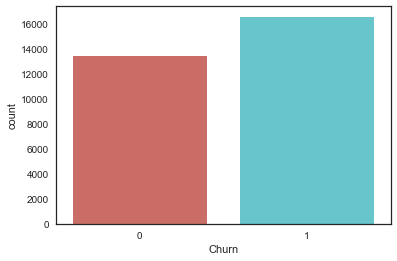

In [372]:
sns.countplot(x=Prediction_df.Churn,data=Prediction_df, palette='hls')
plt.show

# Observations and Recommedations

1) The total incoming calls, outgoing calls, roaming calls, number of times data was recharged in 8th month highly influence the churn. So keeping a close look at these activities of the customer in the 8th month is very crucial.

2) A dip in recharge amount with respect to past month, avg revenue pre user since past month also indicate that the customer might churn.

3) Age of network is a strong indicator. The long the customer is with the telecom opertaor, the lesser is the likelihood of churn.

4) Reduction in data usage compared to previous months also points to the possibility of customer churning.

# ALL CODE ENDS HERE